### RNN Model full constraints

#### 3.1. Set up environment

In [1]:
# --- Imports ---
import os
import sys
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Used by helper_functions

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from delayed_cartpole import DelayedCartPoleEnv
from actor_critic import ActorCriticAgent
from reinforce import train_agent
from helper_functions import plot_metrics, plot_firing_rates

# --- Set Random Seeds ---
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print("Setup Complete.")

2025-04-07 13:59:05.647374: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744027146.021967   59335 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744027146.265612   59335 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744027148.501454   59335 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744027148.501512   59335 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744027148.501516   59335 computation_placer.cc:177] computation placer alr

Added '/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' to sys.path
Setup Complete.


#### 3.2. Configuration

In [2]:
# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "t_delay": 3,
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 1e-3,
    "critic_lr": 1e-3,
    "num_episodes": 600,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

Configuration loaded:
  env_name: CartPole-v1
  t_delay: 3
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.001
  critic_lr: 0.001
  num_episodes: 600
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 20


#### 3.3. Environment setup

In [3]:
# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment with the delay mechanism
print(f"Wrapping environment with action delay t_delay={config['t_delay']}")
env = DelayedCartPoleEnv(base_env, t_delay=config["t_delay"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

Creating base environment: CartPole-v1
Wrapping environment with action delay t_delay=3
Observation size: 4, Action size: 2


(array([ 0.01369617, -0.02302133, -0.04590265, -0.04834723], dtype=float32),
 {})

#### 3.4. Agent setup

In [4]:
# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"]
)

print("Agent Initialized.")

Initializing Actor-Critic Agent...
Agent Initialized.


2025-04-06 13:22:56.614816: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


#### 3.5. Training

In [5]:
# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

Starting training for 600 episodes...
Episode 20	Total Reward: 5.00	Actor Loss: 1.9136	Critic Loss: 9.0129
Episode 40	Total Reward: 5.00	Actor Loss: 1.7021	Critic Loss: 8.1947
Episode 60	Total Reward: 4.00	Actor Loss: 1.0930	Critic Loss: 4.6583
Episode 80	Total Reward: 5.00	Actor Loss: 1.2349	Critic Loss: 6.2234
Episode 100	Total Reward: 6.00	Actor Loss: 1.1346	Critic Loss: 8.1863
Episode 120	Total Reward: 5.00	Actor Loss: 0.6926	Critic Loss: 5.8195
Episode 140	Total Reward: 4.00	Actor Loss: 0.5840	Critic Loss: 3.3580
Episode 160	Total Reward: 9.00	Actor Loss: 1.1434	Critic Loss: 10.2579
Episode 180	Total Reward: 8.00	Actor Loss: 0.7676	Critic Loss: 6.2696
Episode 200	Total Reward: 7.00	Actor Loss: -0.3101	Critic Loss: 7.8490
Episode 220	Total Reward: 6.00	Actor Loss: 0.5698	Critic Loss: 4.1378
Episode 240	Total Reward: 5.00	Actor Loss: 0.2439	Critic Loss: 2.6555
Episode 260	Total Reward: 7.00	Actor Loss: 0.3701	Critic Loss: 3.7584
Episode 280	Total Reward: 11.00	Actor Loss: 1.3132	Cri

#### 3.6. Plot results

Plotting training metrics...


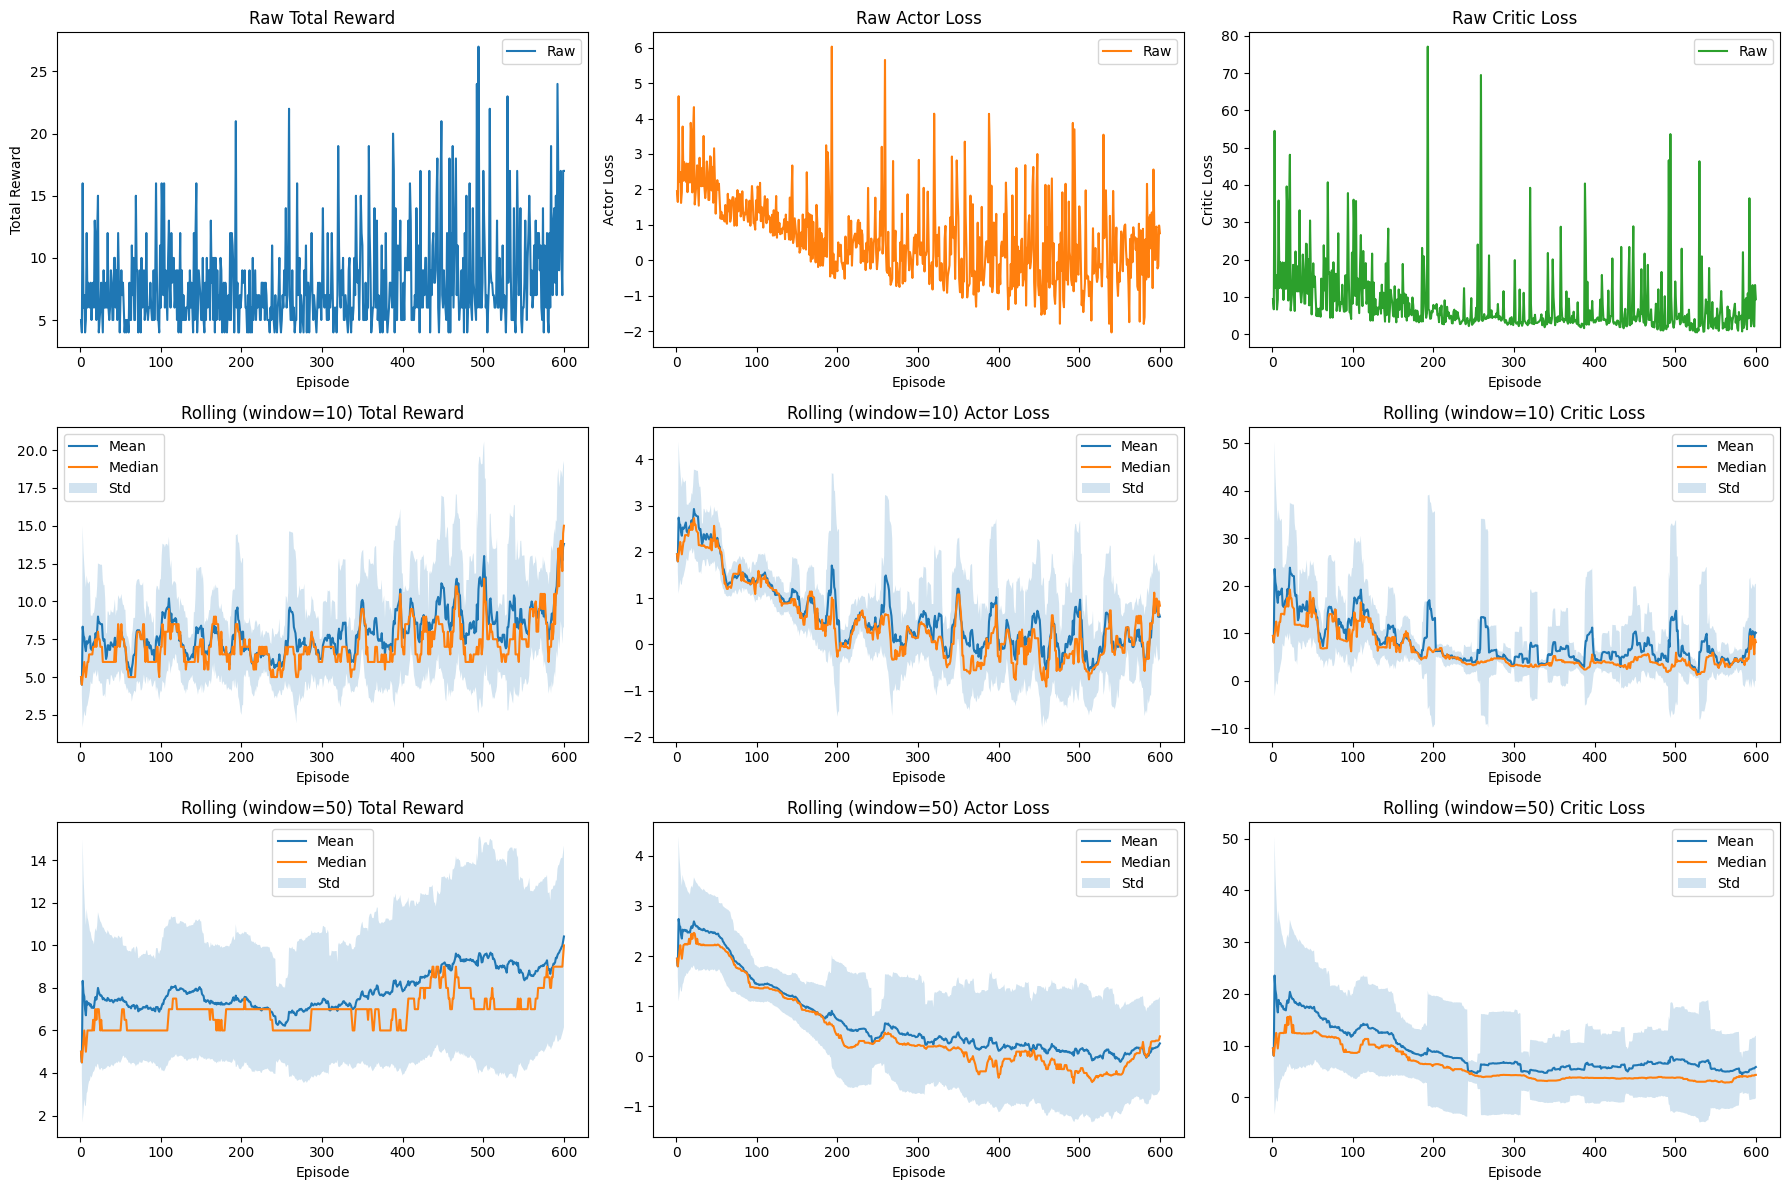

Metrics plot displayed.
Plotting neuron firing rates...


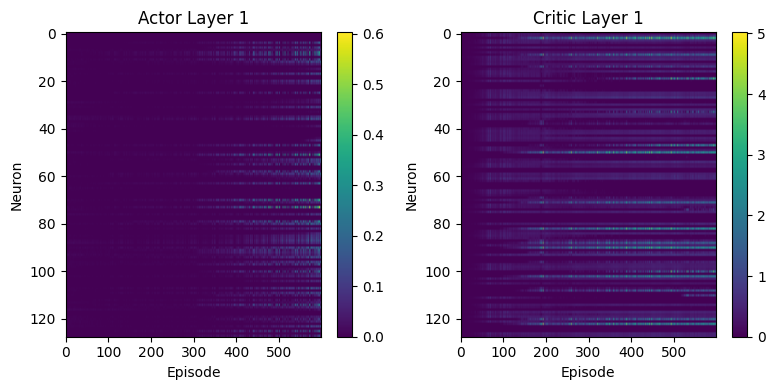

Firing rate plot displayed.


In [6]:
# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=10,
    window_2=50
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

#### 3.7. Cleanup

In [7]:
# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

Closing the environment...
Environment closed.


### 3.8. Modifications: larger learning rate

Configuration loaded:
  env_name: CartPole-v1
  t_delay: 3
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 600
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 20
Creating base environment: CartPole-v1
Wrapping environment with action delay t_delay=3
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 600 episodes...
Episode 20	Total Reward: 5.00	Actor Loss: 1.4029	Critic Loss: 6.5707
Episode 40	Total Reward: 9.00	Actor Loss: 1.1583	Critic Loss: 14.5416
Episode 60	Total Reward: 6.00	Actor Loss: -0.2958	Critic Loss: 8.5259
Episode 80	Total Reward: 6.00	Actor Loss: -0.4217	Critic Loss: 5.0103
Episode 100	Total Reward: 8.00	Actor Loss: 0.7233	Critic Loss: 4.1208
Episode 120	Total Reward: 7.00	Actor Loss: -0.1189	Crit

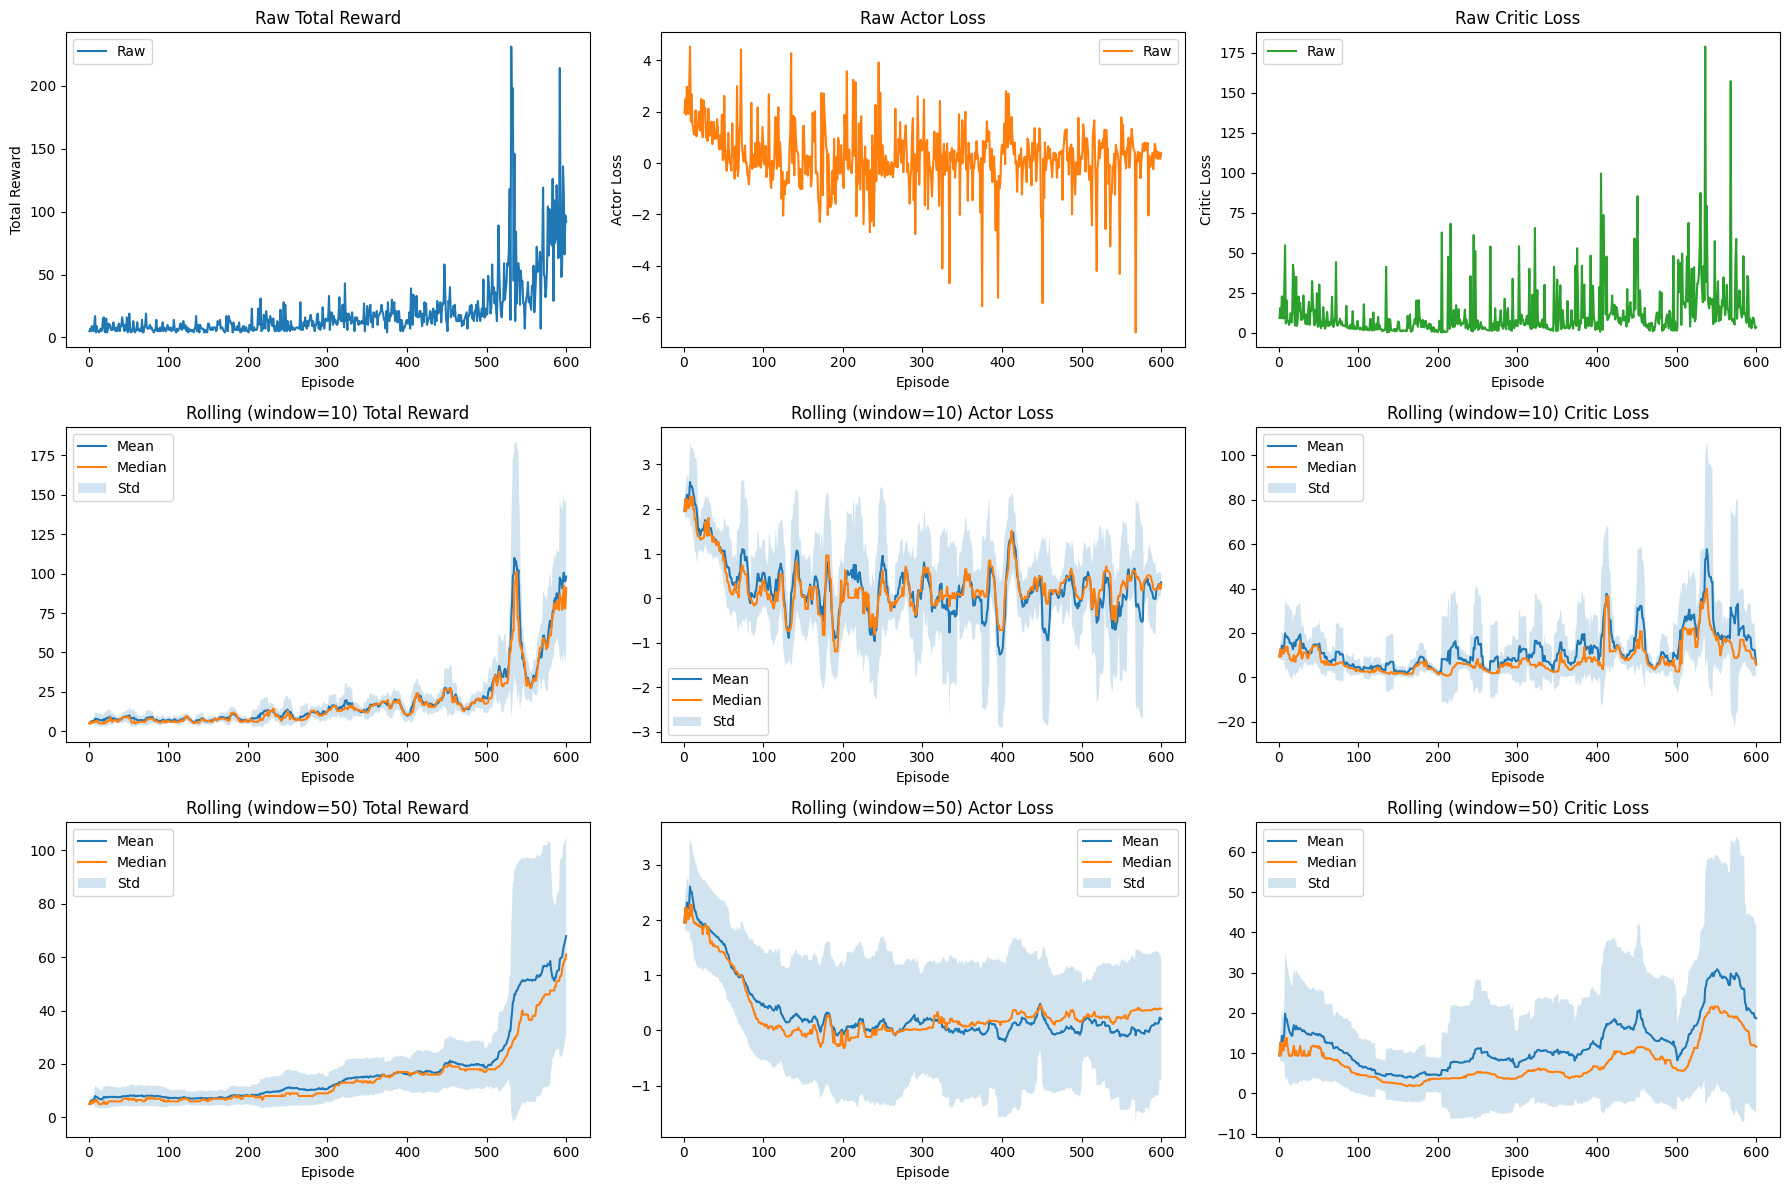

Metrics plot displayed.
Plotting neuron firing rates...


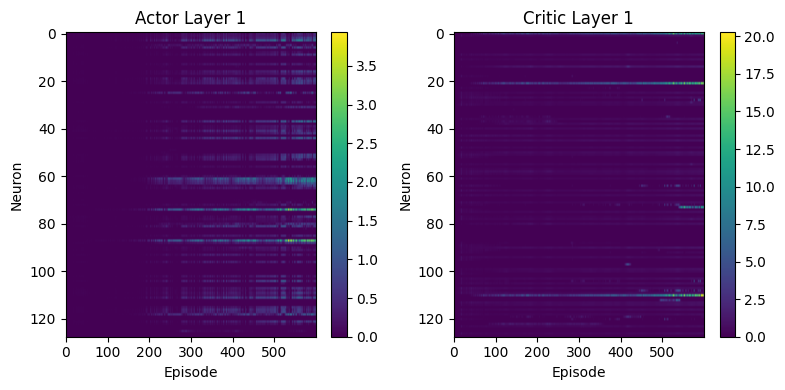

Firing rate plot displayed.
Closing the environment...
Environment closed.


In [8]:
# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "t_delay": 3,
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 600,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment with the delay mechanism
print(f"Wrapping environment with action delay t_delay={config['t_delay']}")
env = DelayedCartPoleEnv(base_env, t_delay=config["t_delay"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=10,
    window_2=50
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

### 3.9. Modifications: larger learning rate

Configuration loaded:
  env_name: CartPole-v1
  t_delay: 3
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.01
  critic_lr: 0.01
  num_episodes: 600
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 20
Creating base environment: CartPole-v1
Wrapping environment with action delay t_delay=3
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 600 episodes...
Episode 20	Total Reward: 5.00	Actor Loss: 1.1275	Critic Loss: 5.5713
Episode 40	Total Reward: 11.00	Actor Loss: 1.5751	Critic Loss: 12.6357
Episode 60	Total Reward: 4.00	Actor Loss: -0.2241	Critic Loss: 1.0050
Episode 80	Total Reward: 5.00	Actor Loss: 0.0362	Critic Loss: 0.7203
Episode 100	Total Reward: 6.00	Actor Loss: -1.0029	Critic Loss: 3.2436
Episode 120	Total Reward: 9.00	Actor Loss: 0.8515	Critic

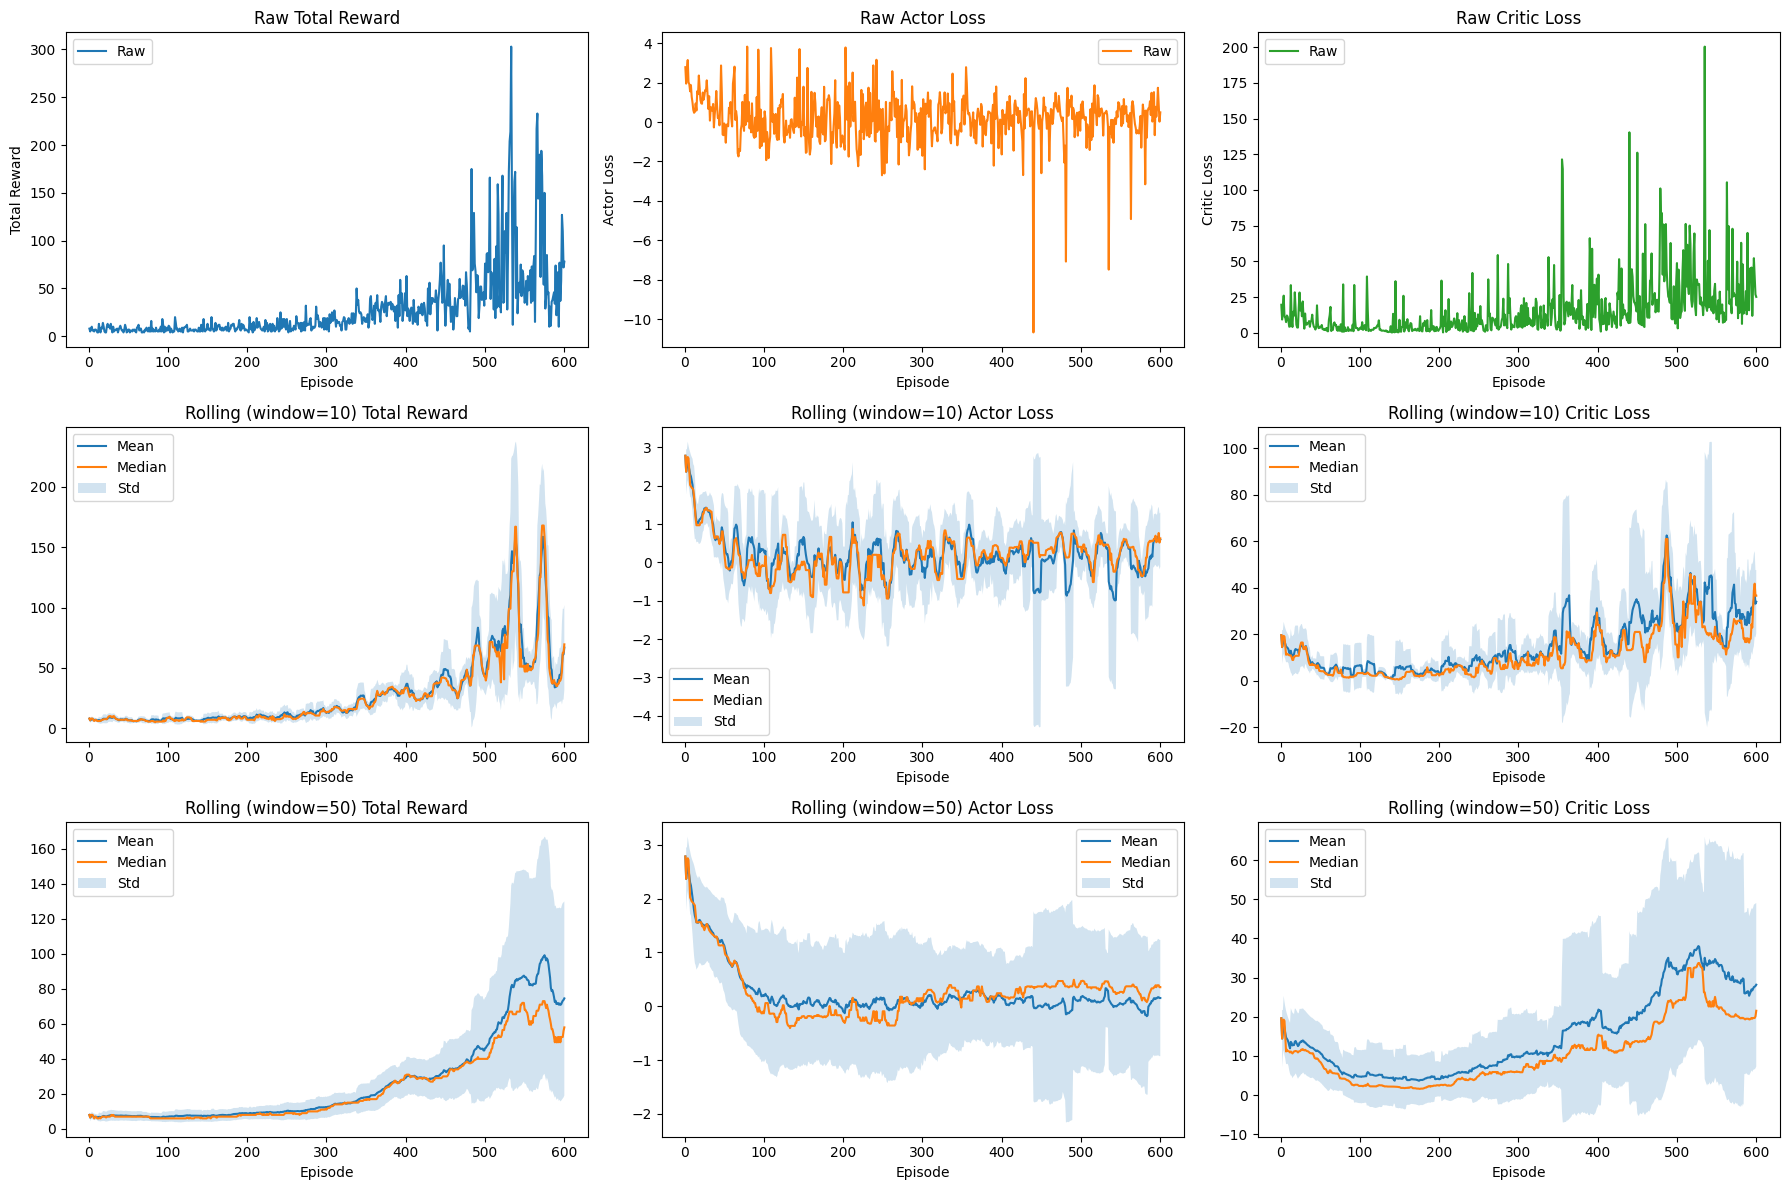

Metrics plot displayed.
Plotting neuron firing rates...


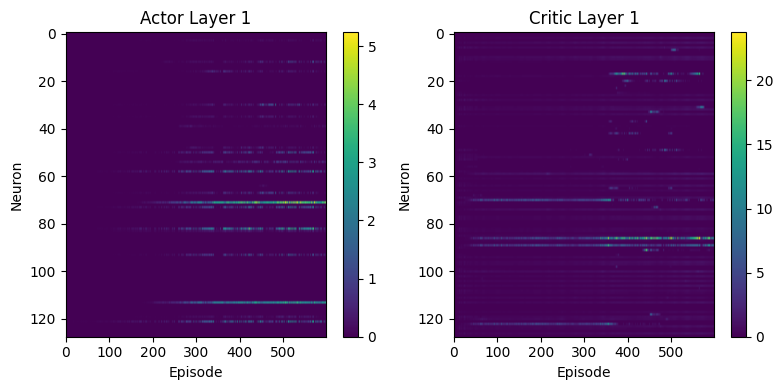

Firing rate plot displayed.
Closing the environment...
Environment closed.


In [9]:
# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "t_delay": 3,
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 1e-2,
    "critic_lr": 1e-2,
    "num_episodes": 600,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment with the delay mechanism
print(f"Wrapping environment with action delay t_delay={config['t_delay']}")
env = DelayedCartPoleEnv(base_env, t_delay=config["t_delay"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=10,
    window_2=50
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

Configuration loaded:
  env_name: CartPole-v1
  t_delay: 3
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.01
  critic_lr: 0.01
  num_episodes: 1000
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 20
Creating base environment: CartPole-v1
Wrapping environment with action delay t_delay=3
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 1000 episodes...
Episode 20	Total Reward: 5.00	Actor Loss: 1.3113	Critic Loss: 7.3121
Episode 40	Total Reward: 8.00	Actor Loss: 1.8633	Critic Loss: 12.8506
Episode 60	Total Reward: 6.00	Actor Loss: -0.0527	Critic Loss: 5.4531
Episode 80	Total Reward: 11.00	Actor Loss: 1.6850	Critic Loss: 10.4596
Episode 100	Total Reward: 6.00	Actor Loss: 1.3414	Critic Loss: 4.7978
Episode 120	Total Reward: 5.00	Actor Loss: -0.5795	Cri

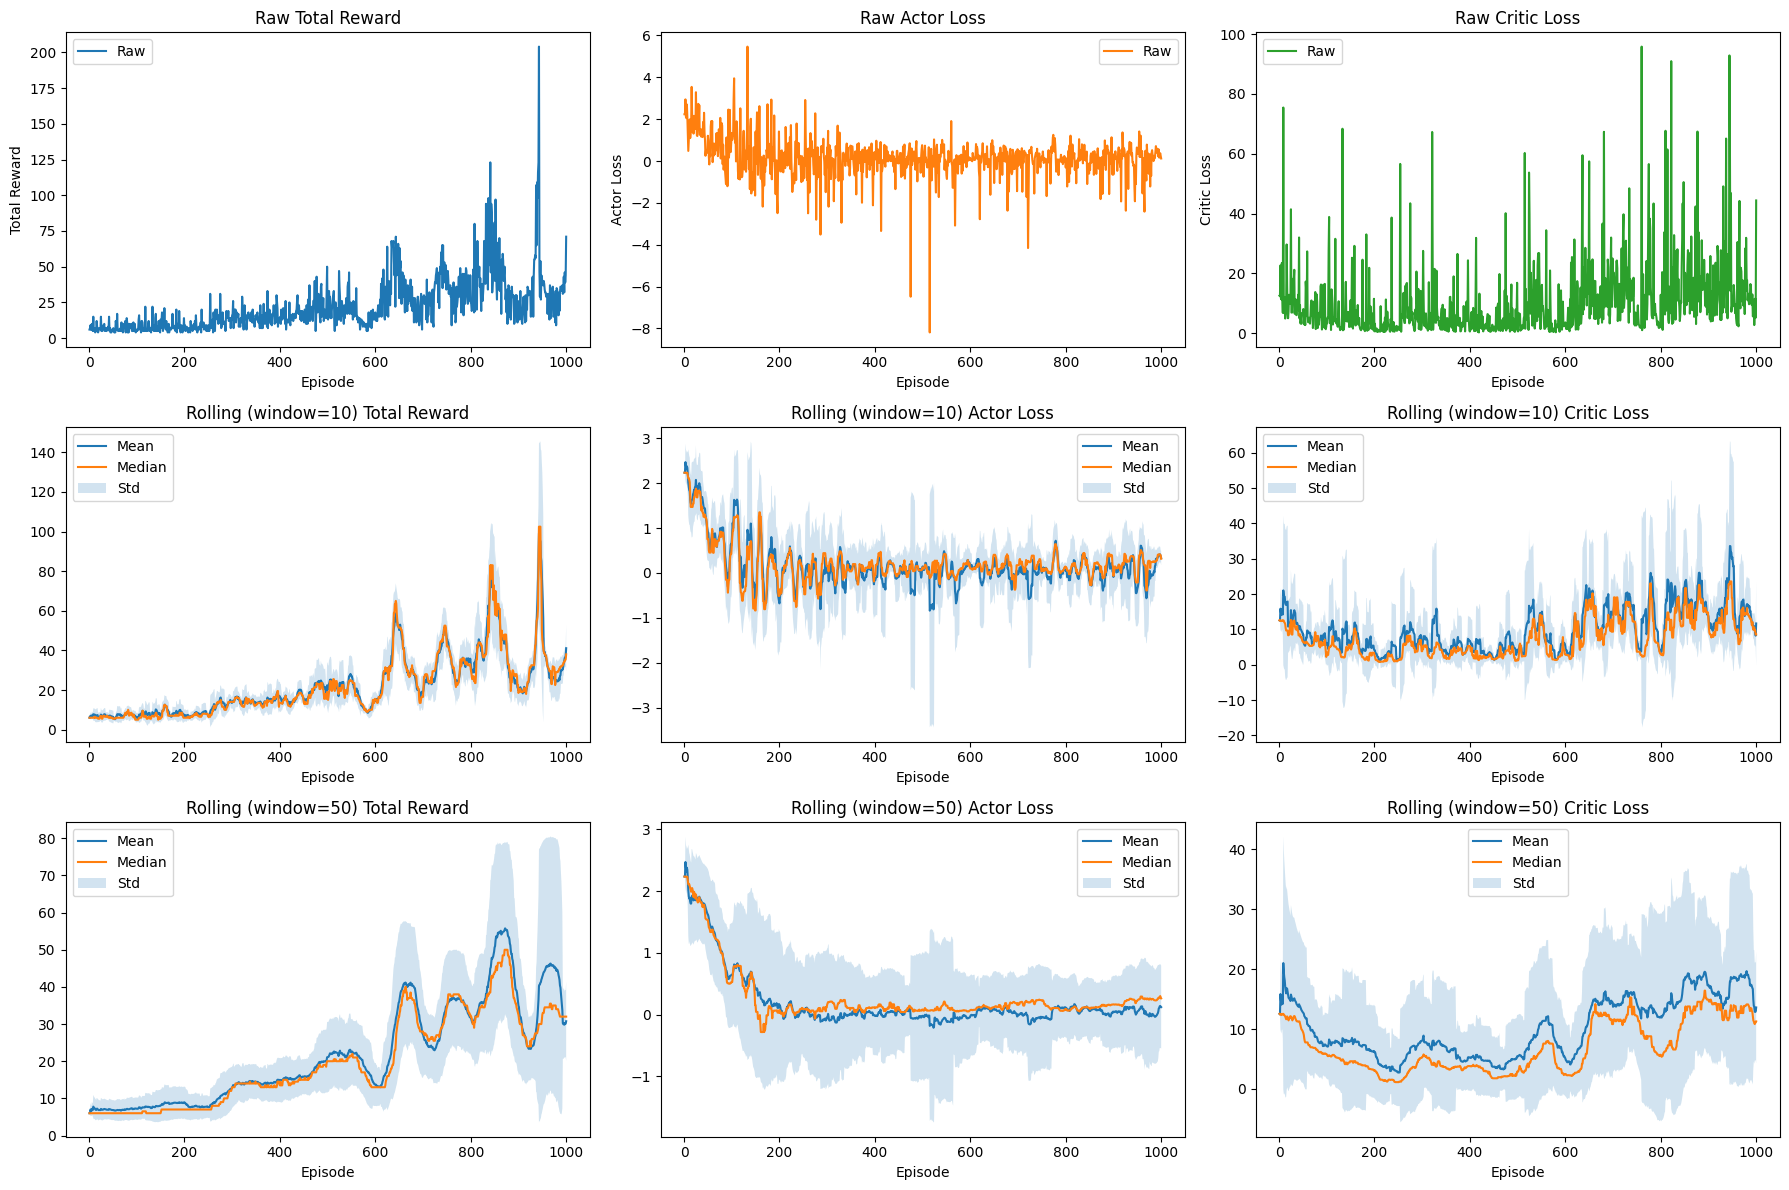

Metrics plot displayed.
Plotting neuron firing rates...


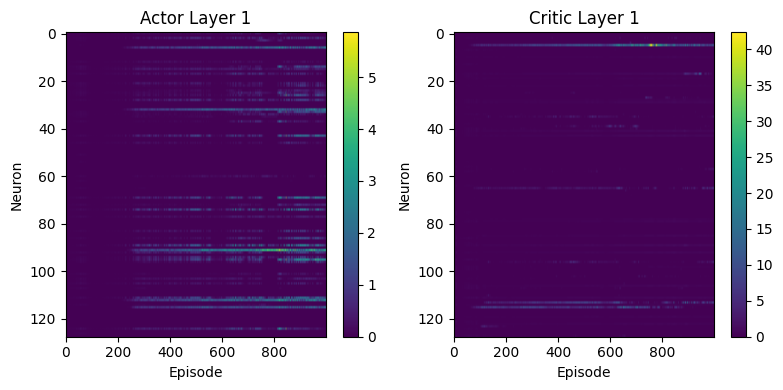

Firing rate plot displayed.
Closing the environment...
Environment closed.


In [ ]:
# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "t_delay": 3,
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 1e-2,
    "critic_lr": 1e-2,
    "num_episodes": 750,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment with the delay mechanism
print(f"Wrapping environment with action delay t_delay={config['t_delay']}")
env = DelayedCartPoleEnv(base_env, t_delay=config["t_delay"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=10,
    window_2=50
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

Configuration loaded:
  env_name: CartPole-v1
  t_delay: 3
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.05
  critic_lr: 0.05
  num_episodes: 1000
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 20
Creating base environment: CartPole-v1
Wrapping environment with action delay t_delay=3
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 1000 episodes...
Episode 20	Total Reward: 8.00	Actor Loss: 0.1142	Critic Loss: 5.1273
Episode 40	Total Reward: 14.00	Actor Loss: 1.9399	Critic Loss: 12.4188
Episode 60	Total Reward: 7.00	Actor Loss: -0.8037	Critic Loss: 3.6570
Episode 80	Total Reward: 11.00	Actor Loss: 1.4196	Critic Loss: 9.4246
Episode 100	Total Reward: 9.00	Actor Loss: 0.0819	Critic Loss: 2.7178
Episode 120	Total Reward: 7.00	Actor Loss: 0.1627	Crit

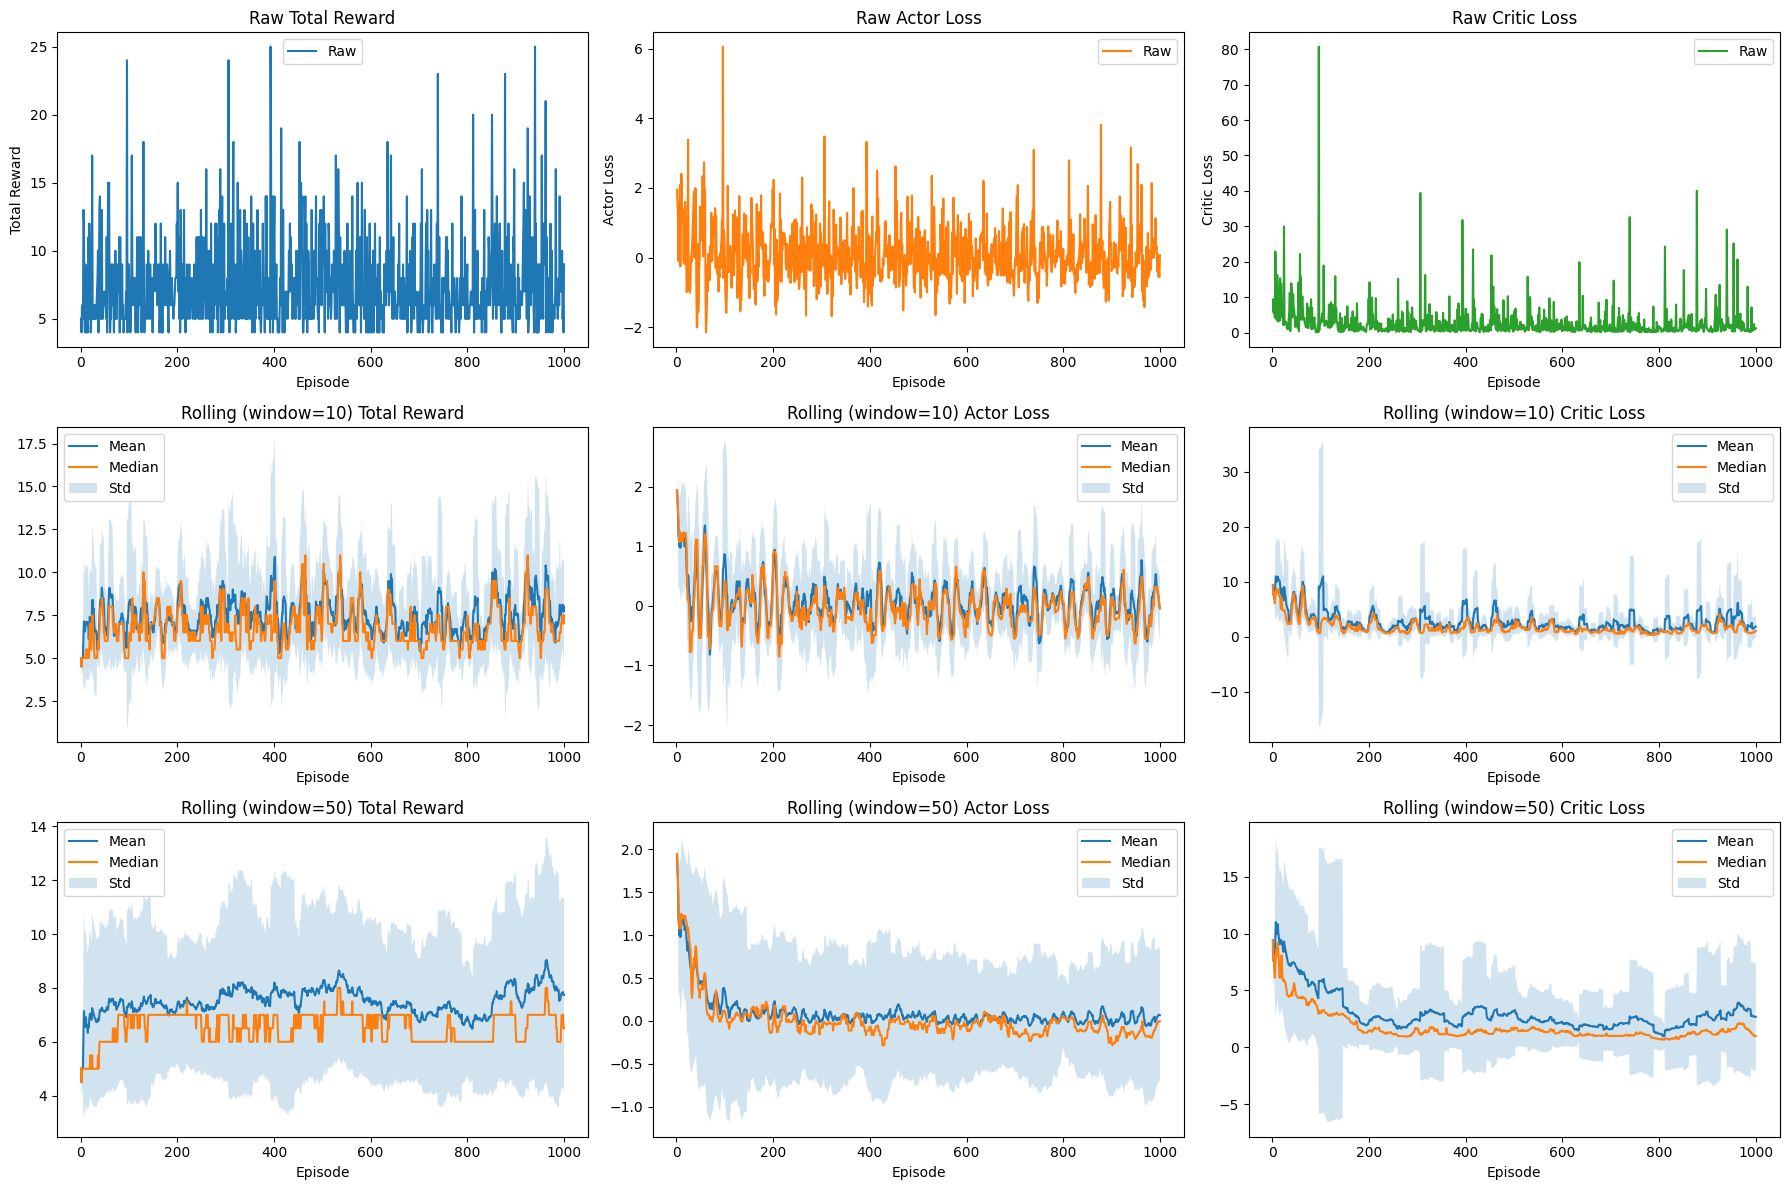

Metrics plot displayed.
Plotting neuron firing rates...


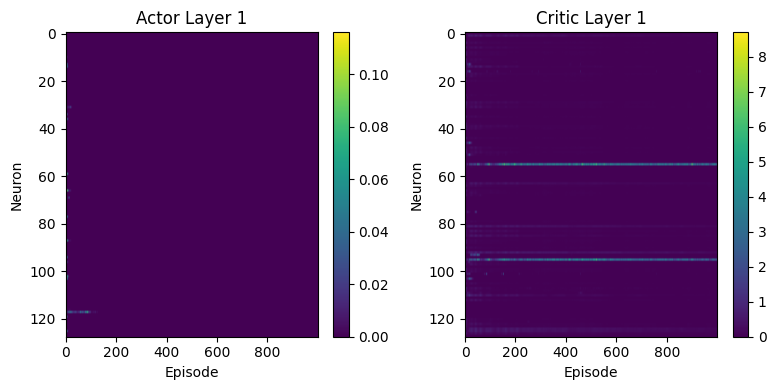

Firing rate plot displayed.
Closing the environment...
Environment closed.


In [ ]:
# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "t_delay": 3,
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-2,
    "critic_lr": 5e-2,
    "num_episodes": 750,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment with the delay mechanism
print(f"Wrapping environment with action delay t_delay={config['t_delay']}")
env = DelayedCartPoleEnv(base_env, t_delay=config["t_delay"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=10,
    window_2=50
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

Configuration loaded:
  env_name: CartPole-v1
  t_delay: 3
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.01
  critic_lr: 0.01
  num_episodes: 750
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 20
Creating base environment: CartPole-v1
Wrapping environment with action delay t_delay=3
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...


2025-04-06 18:08:26.452533: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Agent Initialized.
Starting training for 750 episodes...
Episode 20	Total Reward: 7.00	Actor Loss: 1.9600	Critic Loss: 12.3901
Episode 40	Total Reward: 8.00	Actor Loss: 1.9466	Critic Loss: 12.8102
Episode 60	Total Reward: 6.00	Actor Loss: 0.4676	Critic Loss: 4.8754
Episode 80	Total Reward: 7.00	Actor Loss: 0.4192	Critic Loss: 4.0133
Episode 100	Total Reward: 6.00	Actor Loss: -0.0434	Critic Loss: 2.5996
Episode 120	Total Reward: 5.00	Actor Loss: -0.6786	Critic Loss: 1.9778
Episode 140	Total Reward: 5.00	Actor Loss: -0.5511	Critic Loss: 0.9888
Episode 160	Total Reward: 9.00	Actor Loss: 1.0887	Critic Loss: 4.1999
Episode 180	Total Reward: 6.00	Actor Loss: -0.4206	Critic Loss: 0.8090
Episode 200	Total Reward: 15.00	Actor Loss: 1.7091	Critic Loss: 15.7066
Episode 220	Total Reward: 8.00	Actor Loss: 0.8029	Critic Loss: 3.0353
Episode 240	Total Reward: 12.00	Actor Loss: 0.1842	Critic Loss: 1.5208
Episode 260	Total Reward: 11.00	Actor Loss: -0.5982	Critic Loss: 12.9123
Episode 280	Total Reward:

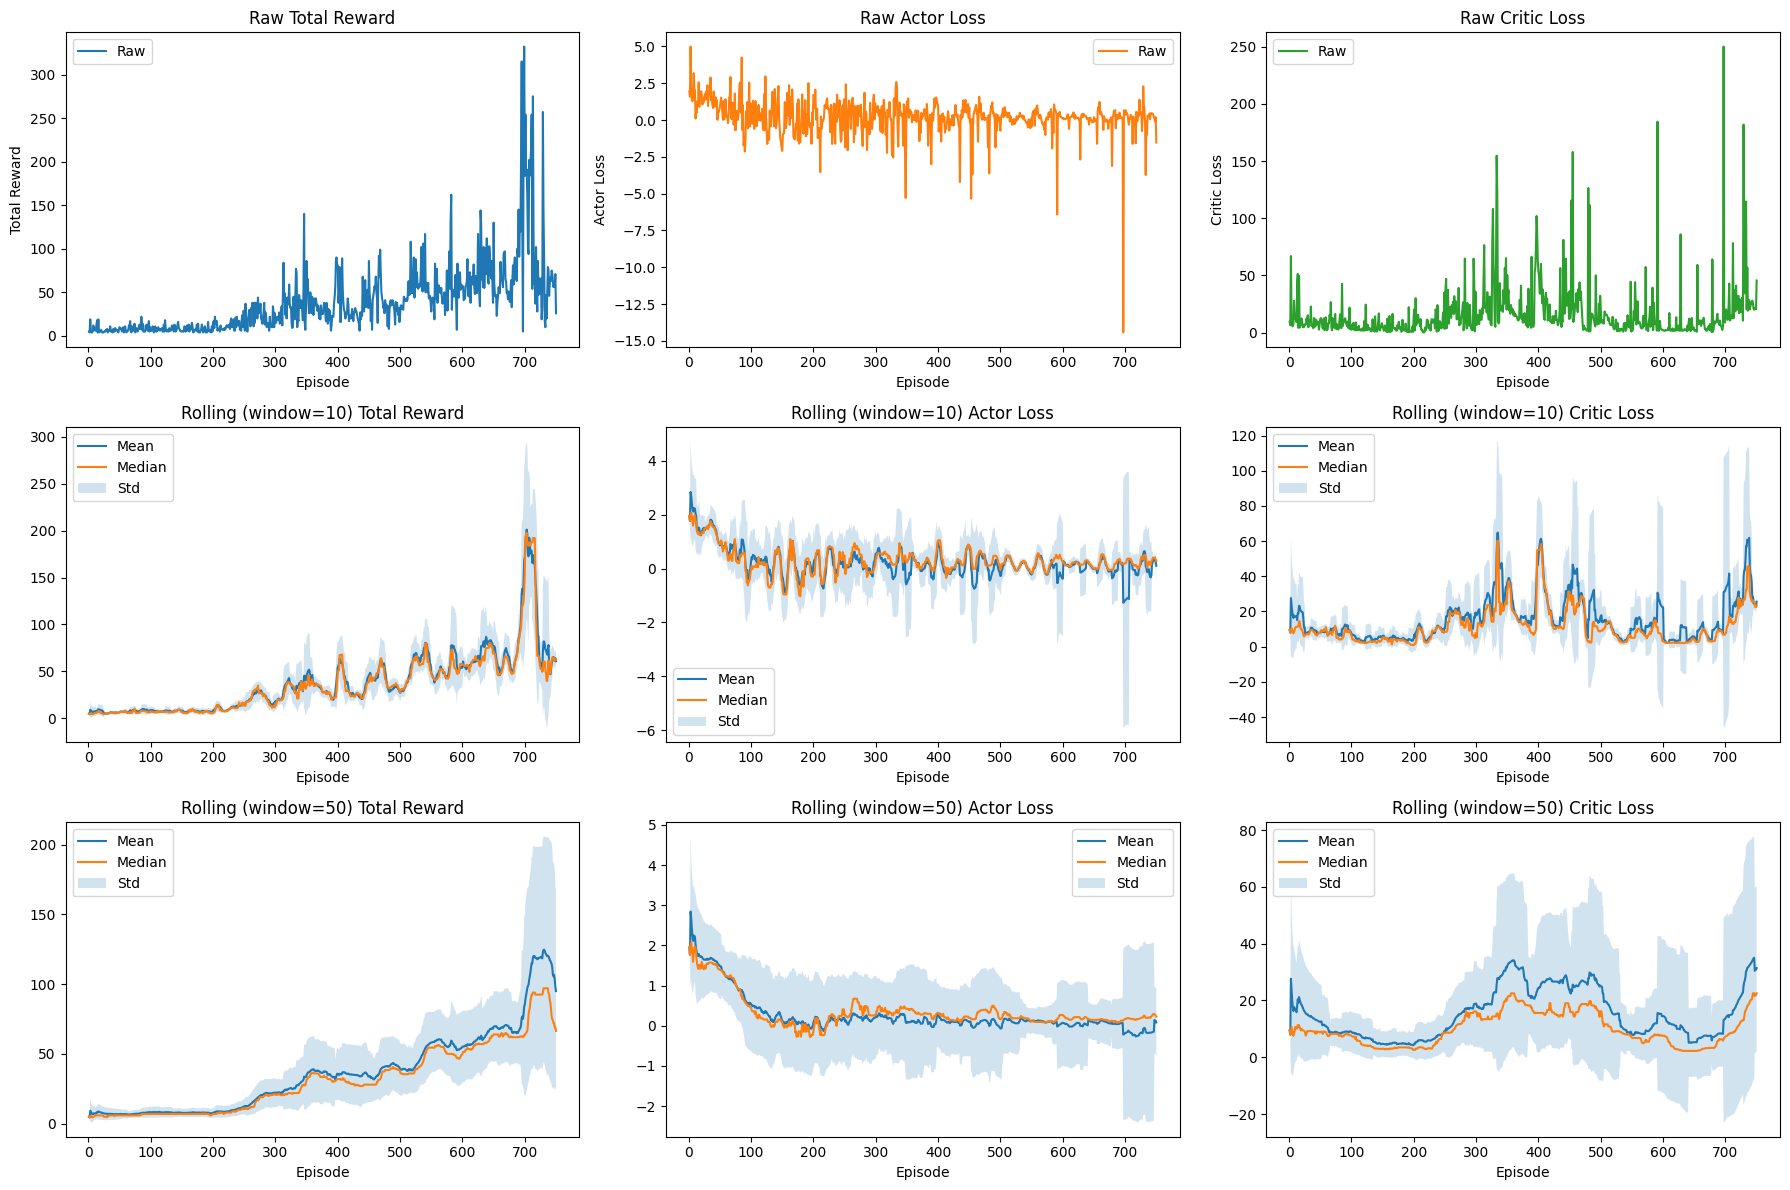

Metrics plot displayed.
Plotting neuron firing rates...


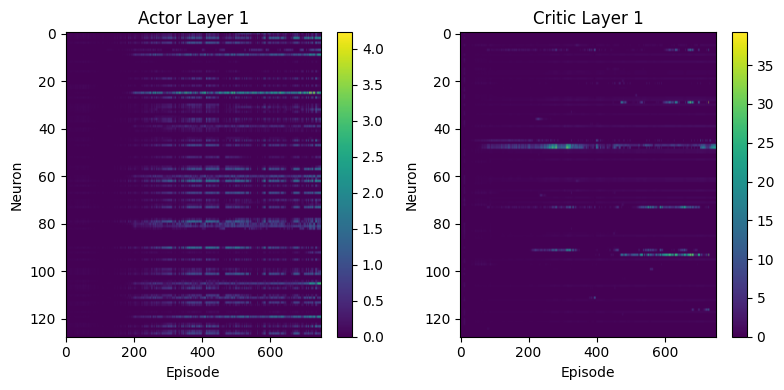

Firing rate plot displayed.
Closing the environment...
Environment closed.


In [2]:
# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "t_delay": 3,
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 1e-2,
    "critic_lr": 1e-2,
    "num_episodes": 750,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment with the delay mechanism
print(f"Wrapping environment with action delay t_delay={config['t_delay']}")
env = DelayedCartPoleEnv(base_env, t_delay=config["t_delay"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=10,
    window_2=50
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

Configuration loaded:
  env_name: CartPole-v1
  t_delay: 3
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 750
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 20
Creating base environment: CartPole-v1
Wrapping environment with action delay t_delay=3
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 750 episodes...
Episode 20	Total Reward: 7.00	Actor Loss: 1.0524	Critic Loss: 11.0258
Episode 40	Total Reward: 11.00	Actor Loss: 1.4920	Critic Loss: 17.8011
Episode 60	Total Reward: 9.00	Actor Loss: 0.9412	Critic Loss: 10.5588
Episode 80	Total Reward: 5.00	Actor Loss: -0.6090	Critic Loss: 3.9054
Episode 100	Total Reward: 6.00	Actor Loss: -0.4849	Critic Loss: 2.4203
Episode 120	Total Reward: 8.00	Actor Loss: 0.2160	Cr

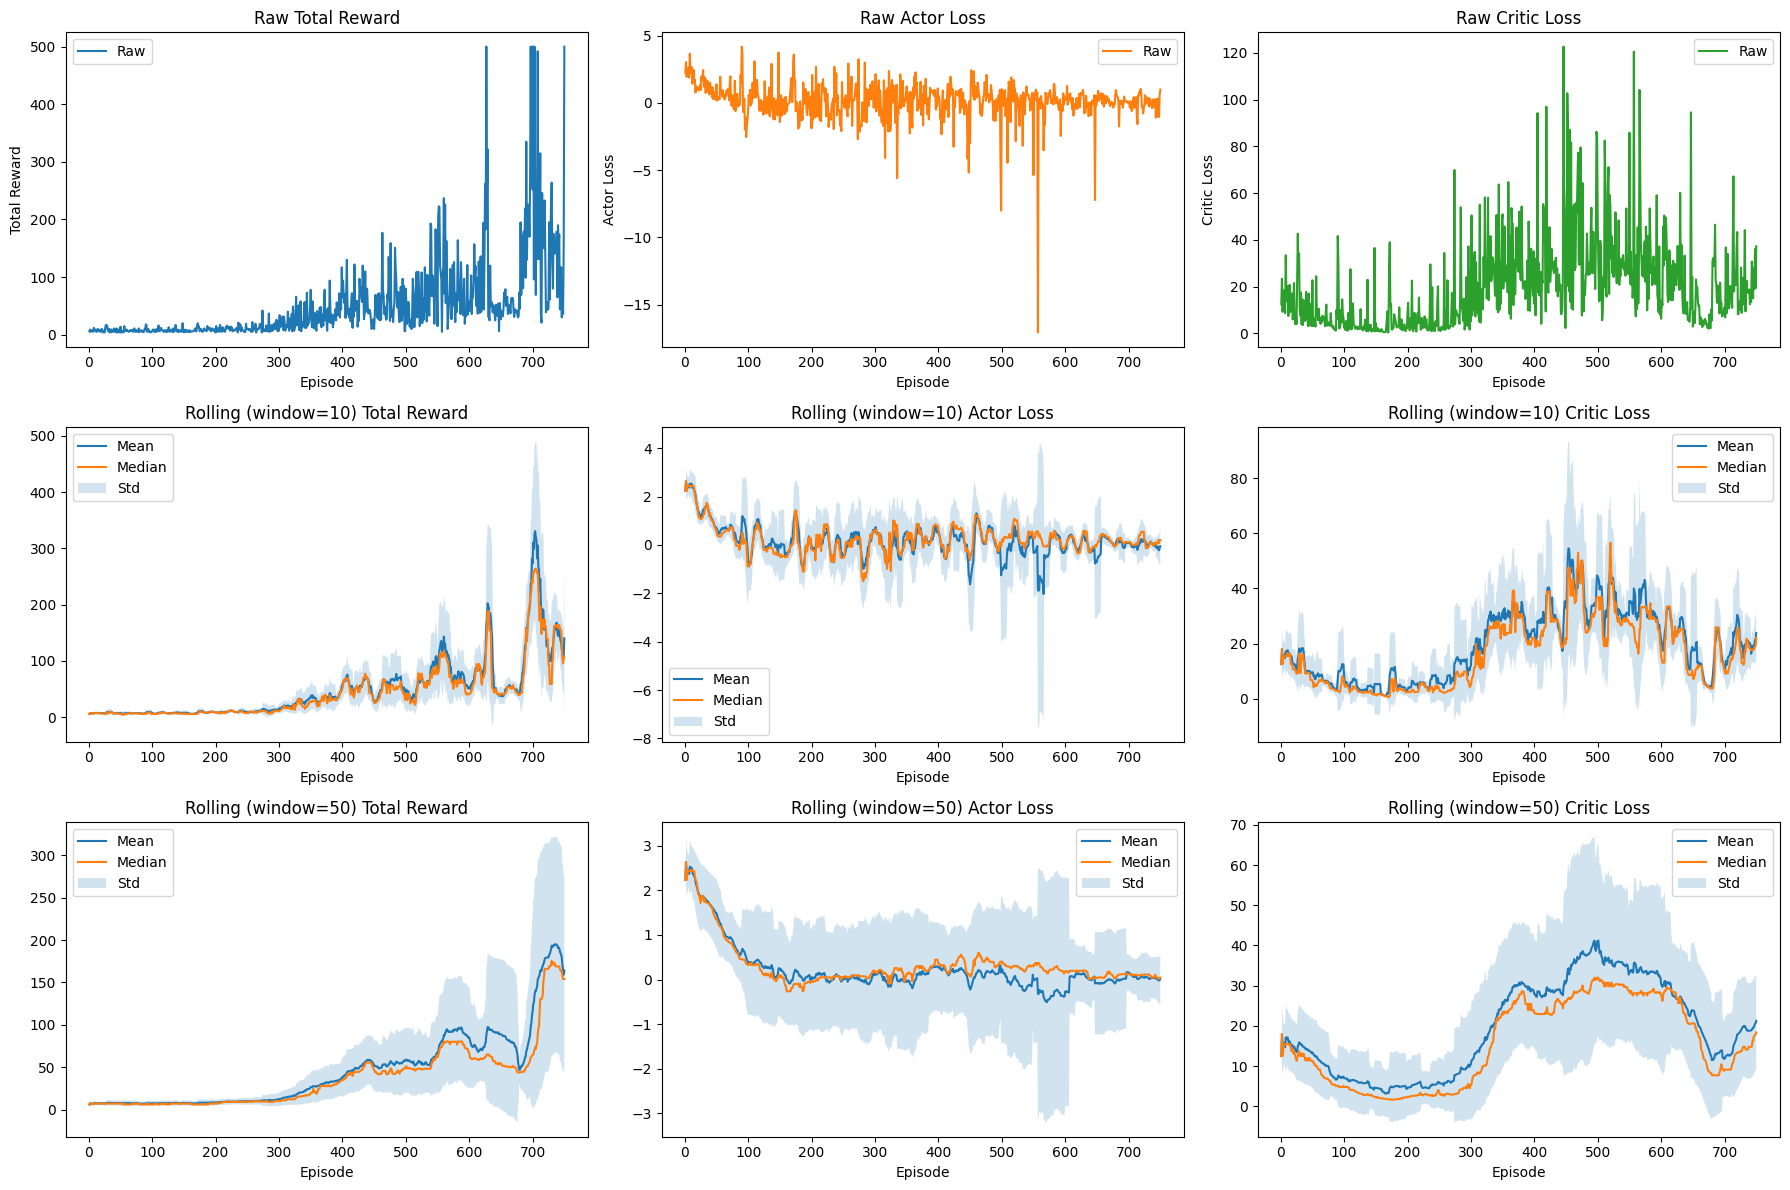

Metrics plot displayed.
Plotting neuron firing rates...


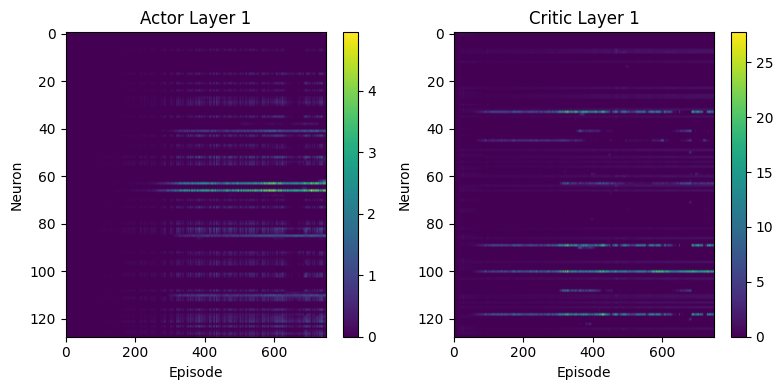

Firing rate plot displayed.
Closing the environment...
Environment closed.


: 

In [ ]:
# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "t_delay": 3,
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 750,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment with the delay mechanism
print(f"Wrapping environment with action delay t_delay={config['t_delay']}")
env = DelayedCartPoleEnv(base_env, t_delay=config["t_delay"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"]
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=10,
    window_2=50
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

#### 3.10. Modification: no time delay

Configuration loaded:
  env_name: CartPole-v1
  t_delay: 0
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 600
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 20
Creating base environment: CartPole-v1
Wrapping environment with action delay t_delay=0
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...


2025-04-06 21:45:01.586472: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Agent Initialized.
Starting training for 600 episodes...
Episode 20	Total Reward: 20.00	Actor Loss: 2.8510	Critic Loss: 51.9147
Episode 40	Total Reward: 15.00	Actor Loss: 1.0108	Critic Loss: 21.5913
Episode 60	Total Reward: 18.00	Actor Loss: 1.5331	Critic Loss: 18.8293
Episode 80	Total Reward: 16.00	Actor Loss: -0.1891	Critic Loss: 15.0167
Episode 100	Total Reward: 15.00	Actor Loss: 2.0302	Critic Loss: 13.7739
Episode 120	Total Reward: 19.00	Actor Loss: 1.0855	Critic Loss: 16.3087
Episode 140	Total Reward: 13.00	Actor Loss: -0.7506	Critic Loss: 8.4253
Episode 160	Total Reward: 19.00	Actor Loss: -6.2805	Critic Loss: 83.7767
Episode 180	Total Reward: 141.00	Actor Loss: 0.5469	Critic Loss: 25.0295
Episode 200	Total Reward: 197.00	Actor Loss: 0.3241	Critic Loss: 16.9185
Episode 220	Total Reward: 167.00	Actor Loss: 1.2910	Critic Loss: 15.8948
Episode 240	Total Reward: 155.00	Actor Loss: 0.7870	Critic Loss: 14.6325
Episode 260	Total Reward: 270.00	Actor Loss: 0.2744	Critic Loss: 4.1284
Episo

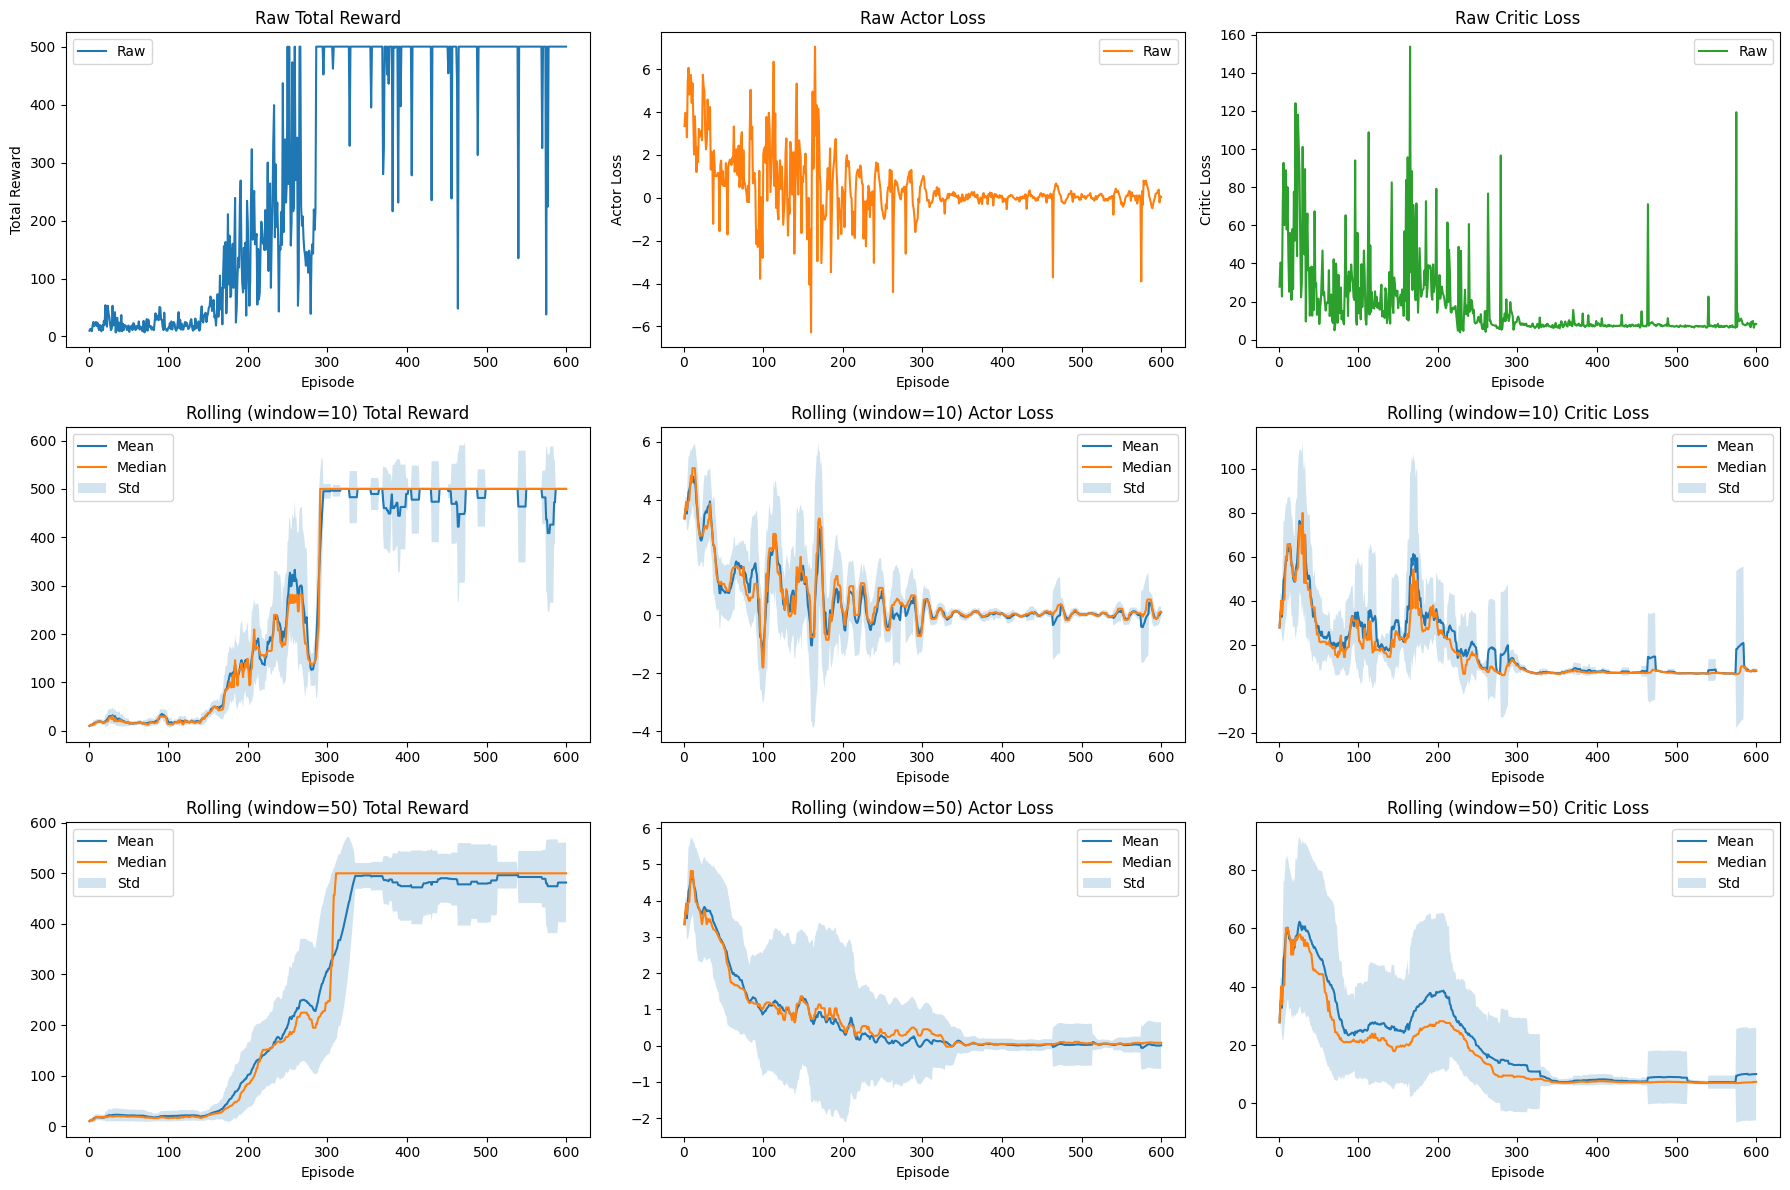

Metrics plot displayed.
Plotting neuron firing rates...


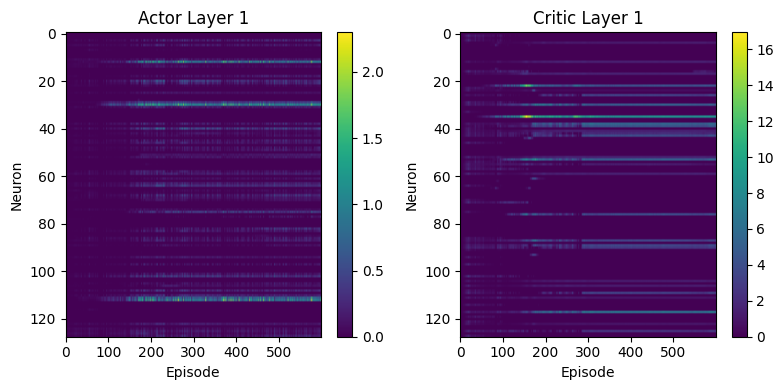

Firing rate plot displayed.
Closing the environment...
Environment closed.


In [2]:
# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "t_delay": 0,
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 600,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment with the delay mechanism
print(f"Wrapping environment with action delay t_delay={config['t_delay']}")
env = DelayedCartPoleEnv(base_env, t_delay=config["t_delay"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=10,
    window_2=50
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

### 3.11. Modification: more time delay

Configuration loaded:
  env_name: CartPole-v1
  t_delay: 5
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 2000
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 20
Creating base environment: CartPole-v1
Wrapping environment with action delay t_delay=5
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...


2025-04-07 09:12:53.292087: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Agent Initialized.
Starting training for 2000 episodes...
Episode 20	Total Reward: 4.00	Actor Loss: 0.1249	Critic Loss: 4.9242
Episode 40	Total Reward: 7.00	Actor Loss: 0.6488	Critic Loss: 7.5978
Episode 60	Total Reward: 4.00	Actor Loss: 0.0049	Critic Loss: 1.7002
Episode 80	Total Reward: 5.00	Actor Loss: -0.0602	Critic Loss: 1.0099
Episode 100	Total Reward: 4.00	Actor Loss: -0.6331	Critic Loss: 0.6113
Episode 120	Total Reward: 4.00	Actor Loss: -0.3536	Critic Loss: 1.9200
Episode 140	Total Reward: 6.00	Actor Loss: 0.4843	Critic Loss: 0.9582
Episode 160	Total Reward: 4.00	Actor Loss: -0.0835	Critic Loss: 0.2343
Episode 180	Total Reward: 4.00	Actor Loss: -0.5269	Critic Loss: 1.2948
Episode 200	Total Reward: 4.00	Actor Loss: -0.2132	Critic Loss: 0.4606
Episode 220	Total Reward: 4.00	Actor Loss: -0.4540	Critic Loss: 0.8553
Episode 240	Total Reward: 4.00	Actor Loss: -0.6089	Critic Loss: 0.6363
Episode 260	Total Reward: 5.00	Actor Loss: 0.1070	Critic Loss: 0.0913
Episode 280	Total Reward: 5.

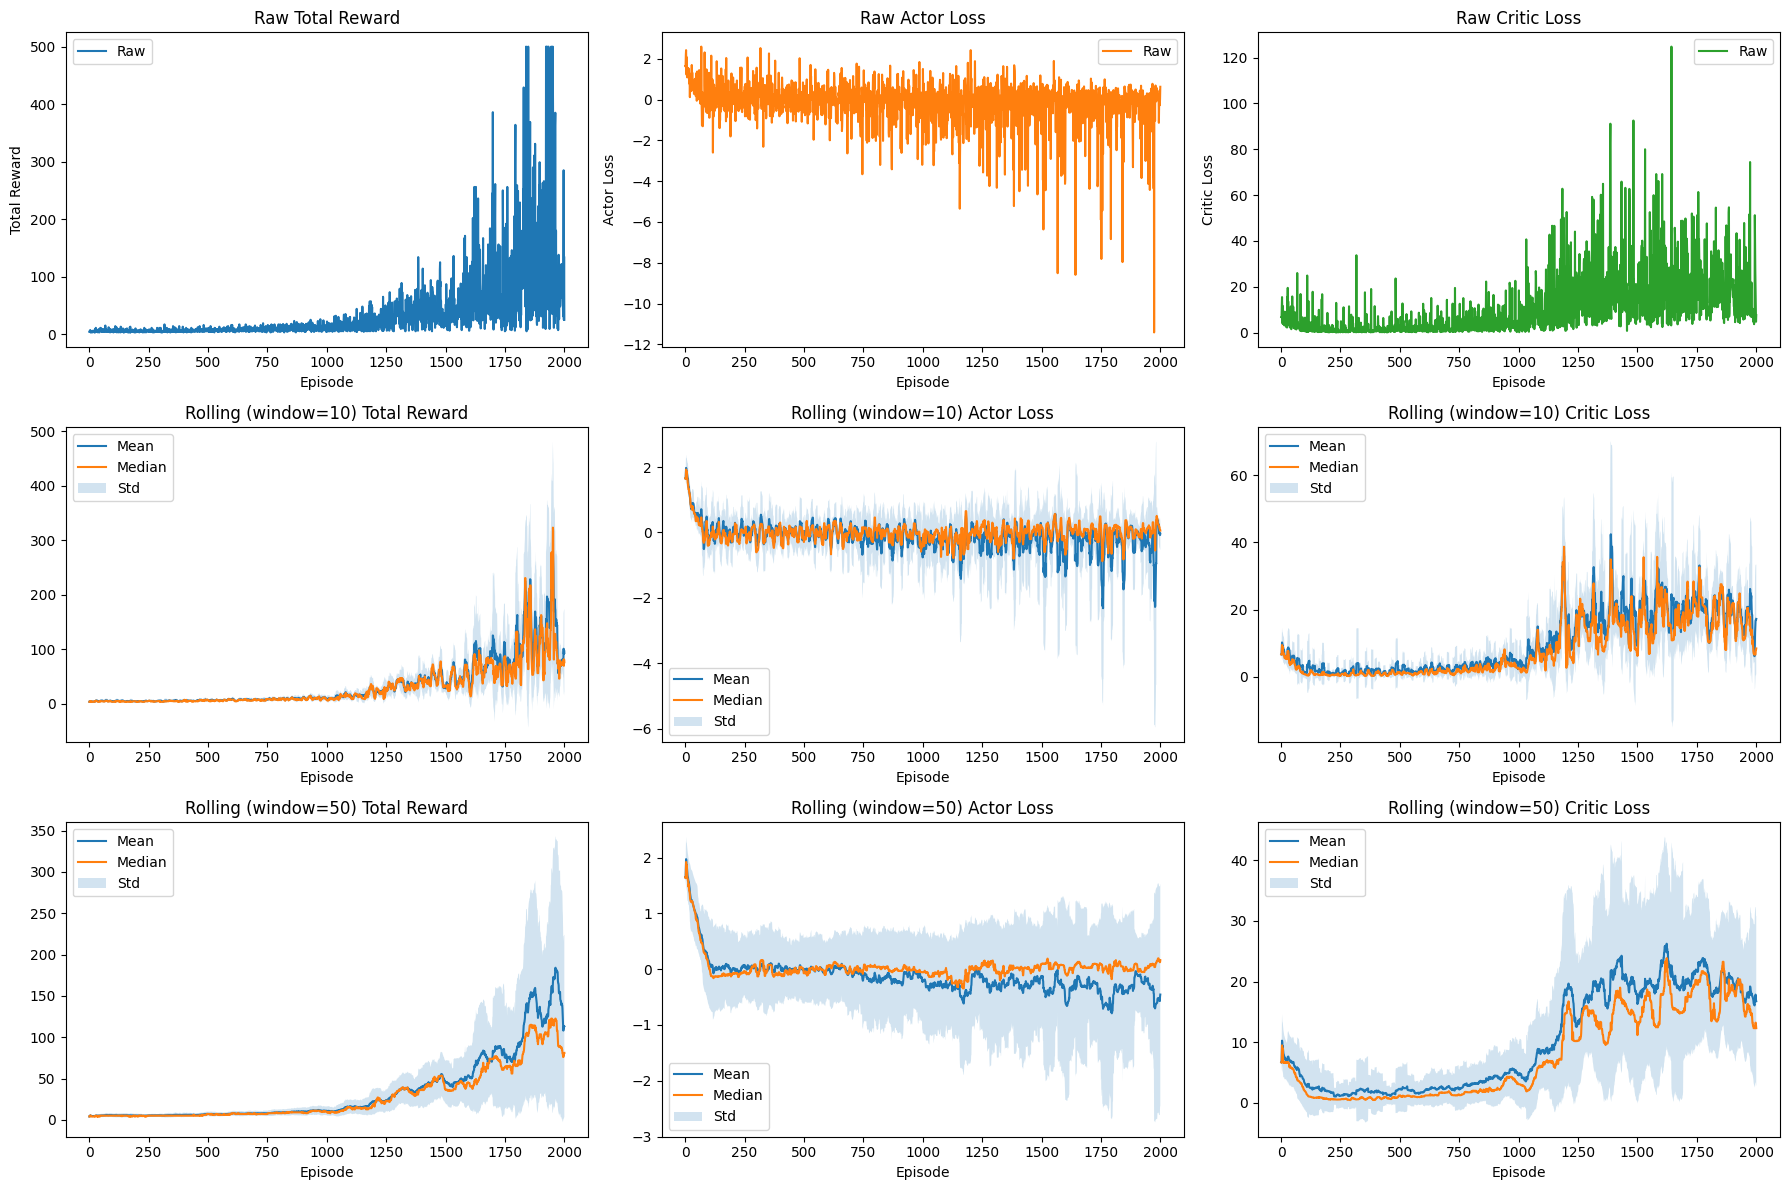

Metrics plot displayed.
Plotting neuron firing rates...


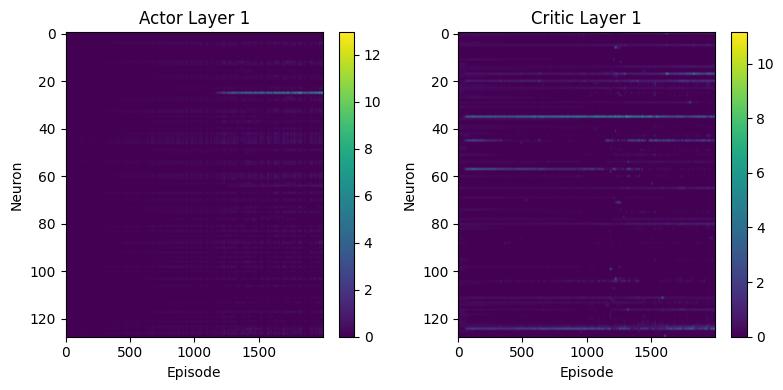

Firing rate plot displayed.
Closing the environment...
Environment closed.


In [2]:
# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "t_delay": 5,
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 2000,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment with the delay mechanism
print(f"Wrapping environment with action delay t_delay={config['t_delay']}")
env = DelayedCartPoleEnv(base_env, t_delay=config["t_delay"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=10,
    window_2=50
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

Configuration loaded:
  env_name: CartPole-v1
  t_delay: 5
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 2200
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 20
Creating base environment: CartPole-v1
Wrapping environment with action delay t_delay=5
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...


2025-04-07 13:59:45.940974: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Agent Initialized.
Starting training for 2200 episodes...
Episode 20	Total Reward: 4.00	Actor Loss: 0.2577	Critic Loss: 4.7956
Episode 40	Total Reward: 7.00	Actor Loss: 0.6618	Critic Loss: 7.6234
Episode 60	Total Reward: 4.00	Actor Loss: -0.0186	Critic Loss: 1.6684
Episode 80	Total Reward: 6.00	Actor Loss: -0.0219	Critic Loss: 0.6378
Episode 100	Total Reward: 9.00	Actor Loss: 1.1521	Critic Loss: 3.9690
Episode 120	Total Reward: 7.00	Actor Loss: 0.8893	Critic Loss: 2.3155
Episode 140	Total Reward: 6.00	Actor Loss: 0.0622	Critic Loss: 0.7822
Episode 160	Total Reward: 4.00	Actor Loss: -0.0653	Critic Loss: 0.2096
Episode 180	Total Reward: 6.00	Actor Loss: -0.0403	Critic Loss: 0.5389
Episode 200	Total Reward: 5.00	Actor Loss: 0.0005	Critic Loss: 0.2923
Episode 220	Total Reward: 4.00	Actor Loss: -0.2799	Critic Loss: 0.3530
Episode 240	Total Reward: 3.00	Actor Loss: -0.8030	Critic Loss: 1.4888
Episode 260	Total Reward: 3.00	Actor Loss: -1.4736	Critic Loss: 4.7840
Episode 280	Total Reward: 9.0

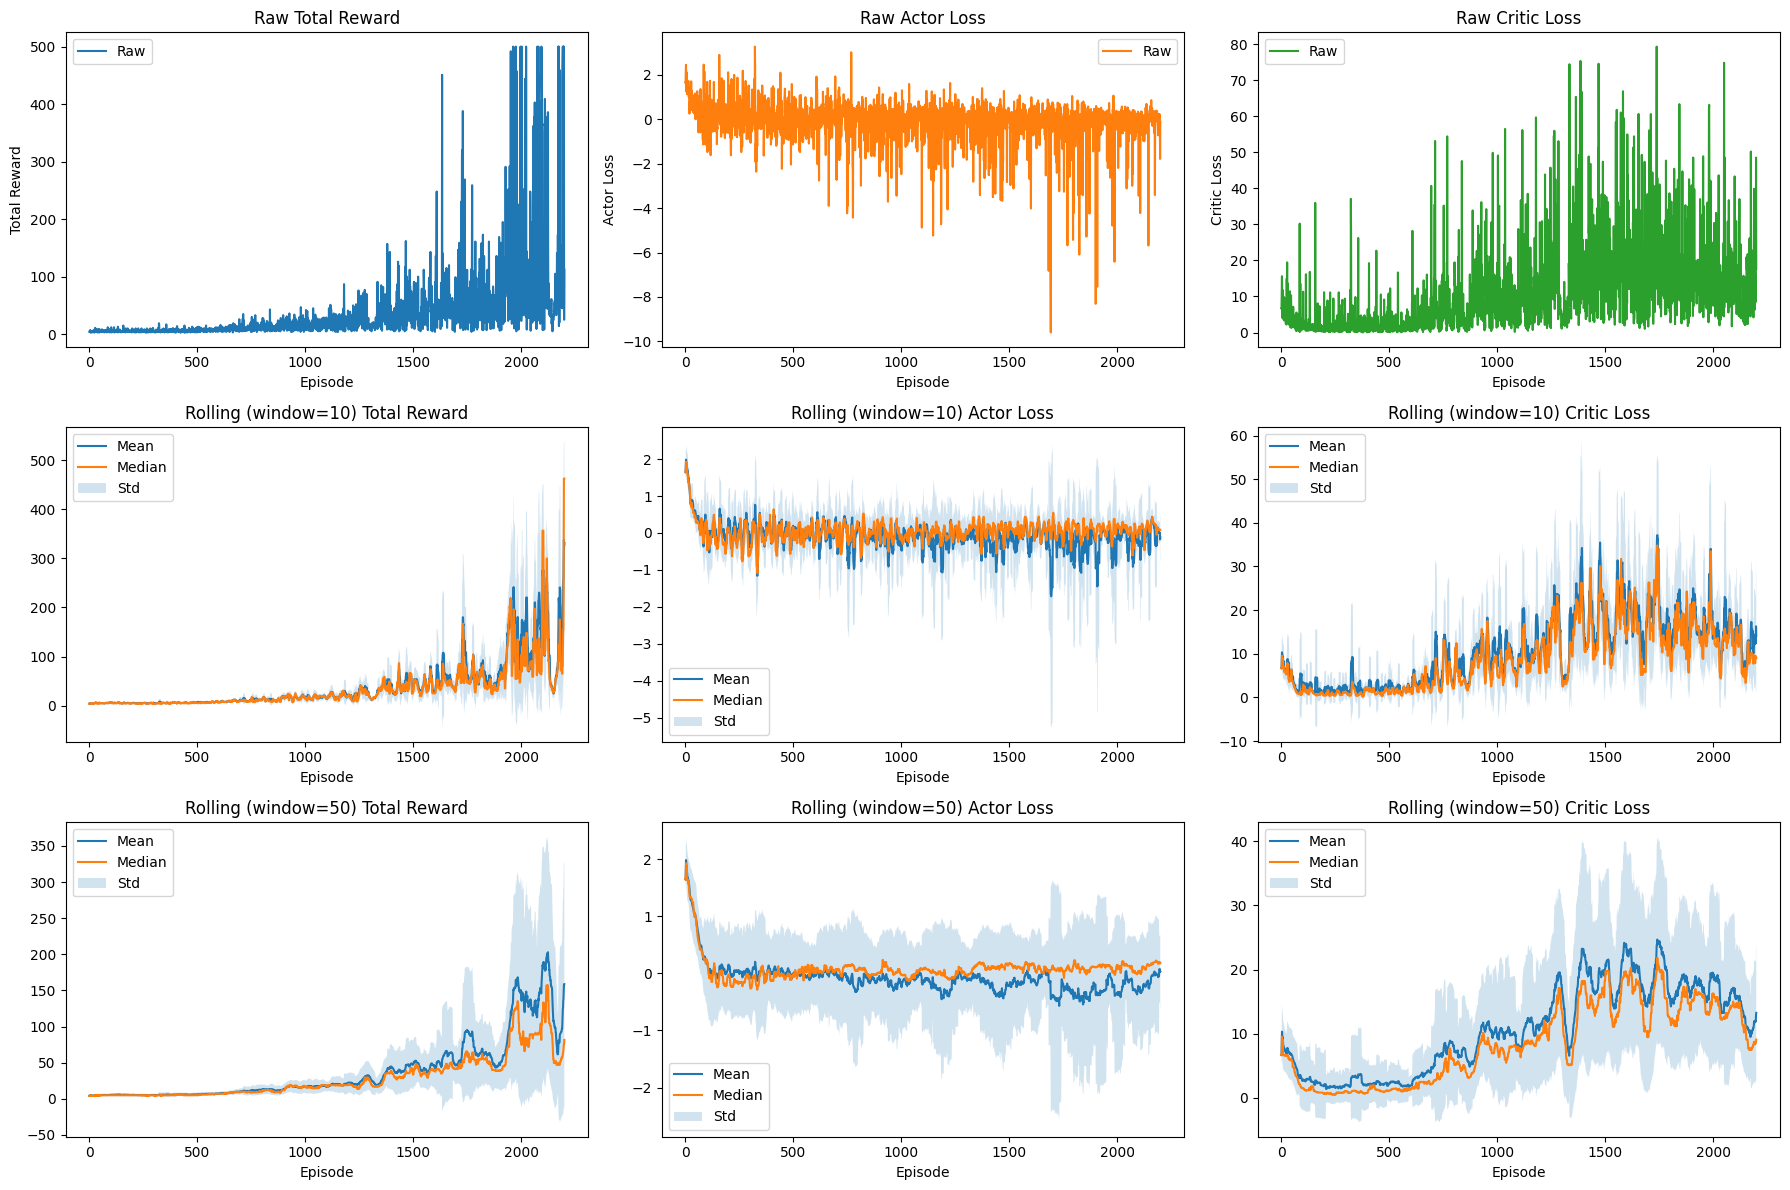

Metrics plot displayed.
Plotting neuron firing rates...


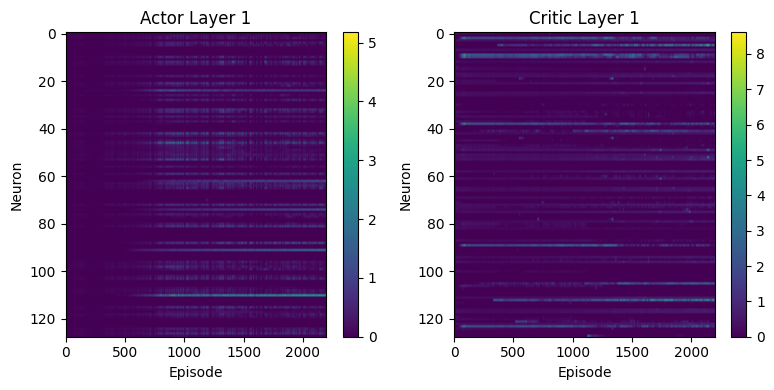

Firing rate plot displayed.
Closing the environment...
Environment closed.


In [2]:
# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "t_delay": 5,
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 2200,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment with the delay mechanism
print(f"Wrapping environment with action delay t_delay={config['t_delay']}")
env = DelayedCartPoleEnv(base_env, t_delay=config["t_delay"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=10,
    window_2=50
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

#### 3.12 Dense

Configuration loaded:
  env_name: CartPole-v1
  t_delay: 3
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 500
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: Dense
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 20
Creating base environment: CartPole-v1
Wrapping environment with action delay t_delay=3
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 500 episodes...
Episode 20	Total Reward: 7.00	Actor Loss: -0.8264	Critic Loss: 7.1156
Episode 40	Total Reward: 5.00	Actor Loss: -0.3680	Critic Loss: 1.1855
Episode 60	Total Reward: 6.00	Actor Loss: -0.8108	Critic Loss: 3.0566
Episode 80	Total Reward: 28.00	Actor Loss: 2.3779	Critic Loss: 39.8145
Episode 100	Total Reward: 30.00	Actor Loss: 2.6143	Critic Loss: 45.1274
Episode 120	Total Reward: 25.00	Actor Loss: -1.3870	Critic

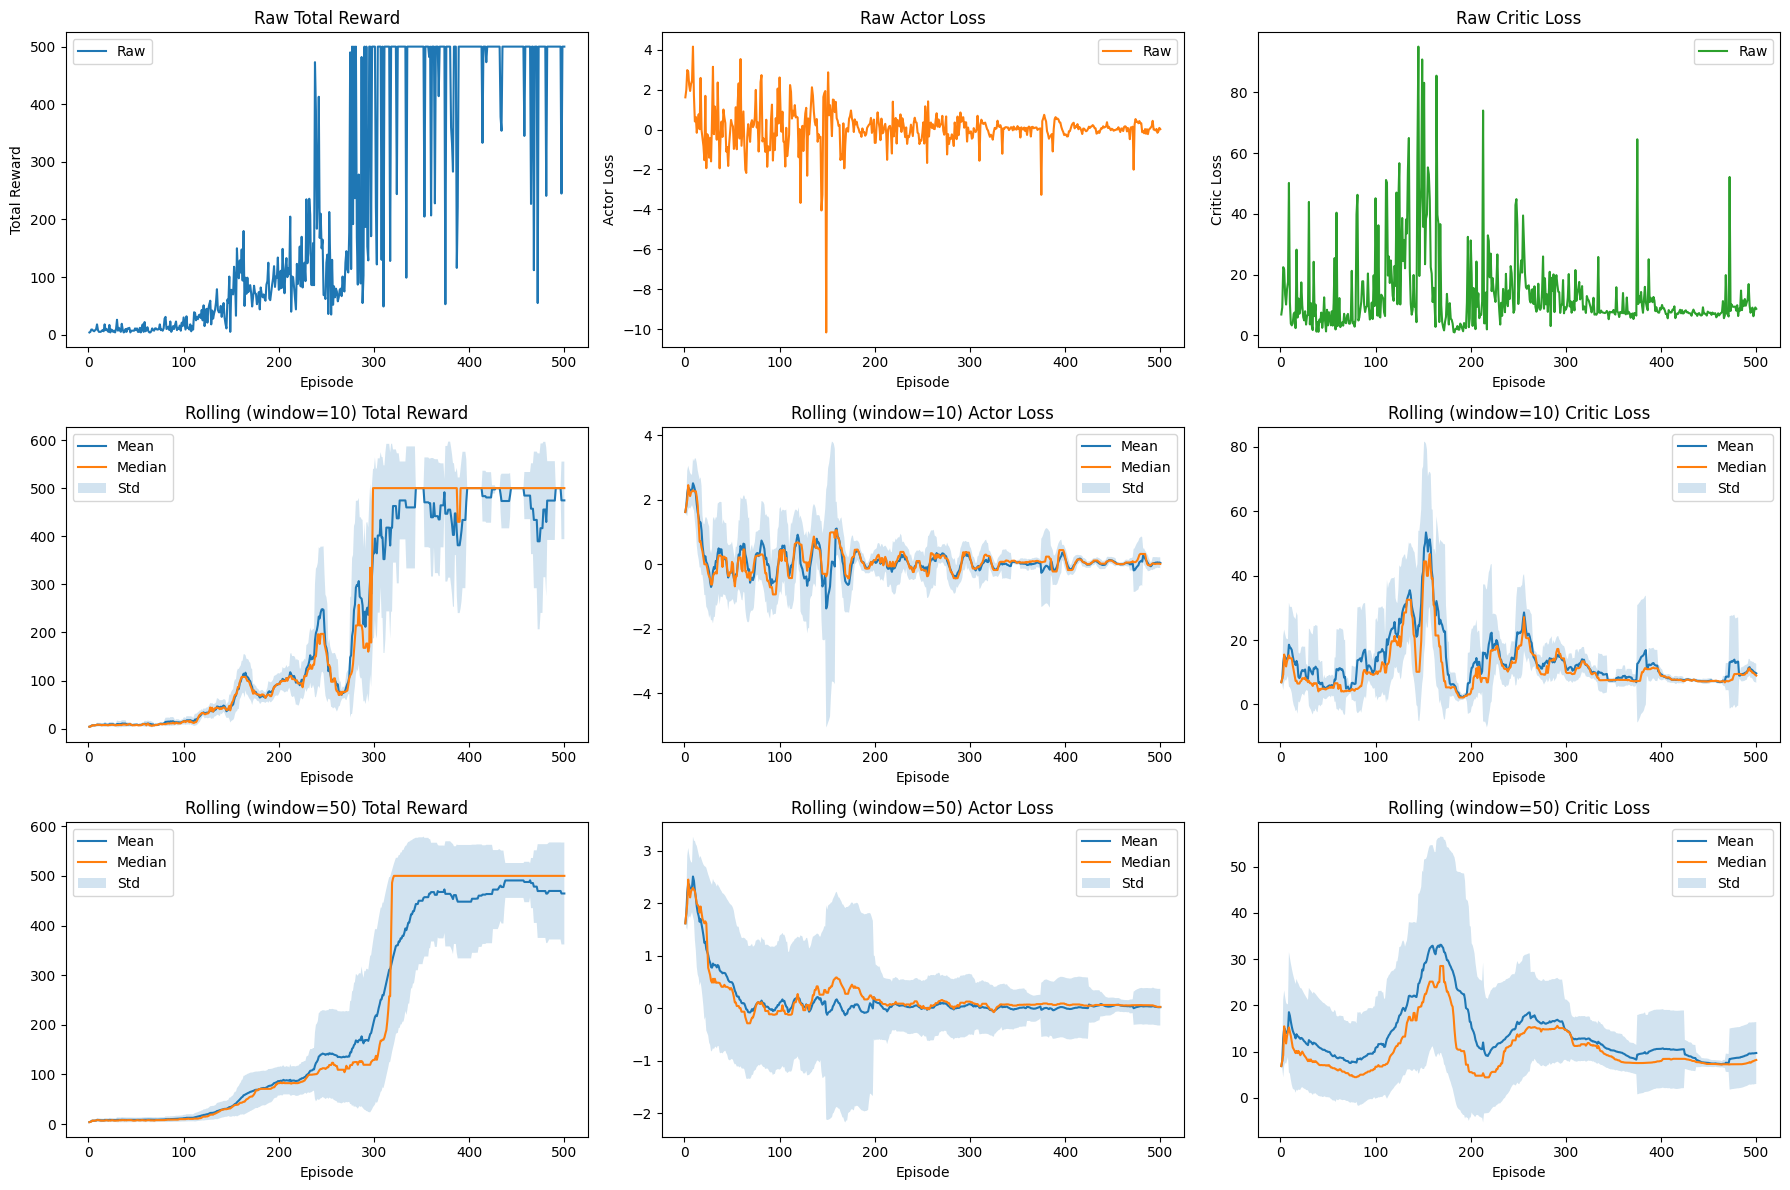

Metrics plot displayed.
Firing rate data not available (models might be Dense or logging was disabled/failed).
Closing the environment...
Environment closed.


In [3]:
# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "t_delay": 3,
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 500,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "Dense",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment with the delay mechanism
print(f"Wrapping environment with action delay t_delay={config['t_delay']}")
env = DelayedCartPoleEnv(base_env, t_delay=config["t_delay"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=10,
    window_2=50
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

Configuration loaded:
  env_name: CartPole-v1
  t_delay: 5
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 500
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: Dense
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 20
Creating base environment: CartPole-v1
Wrapping environment with action delay t_delay=5
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 500 episodes...
Episode 20	Total Reward: 6.00	Actor Loss: 0.5318	Critic Loss: 2.9022
Episode 40	Total Reward: 5.00	Actor Loss: 0.1493	Critic Loss: 1.1697
Episode 60	Total Reward: 4.00	Actor Loss: -0.1792	Critic Loss: 0.5661
Episode 80	Total Reward: 4.00	Actor Loss: 0.2981	Critic Loss: 0.2924
Episode 100	Total Reward: 5.00	Actor Loss: 0.4796	Critic Loss: 0.6494
Episode 120	Total Reward: 4.00	Actor Loss: 0.0348	Critic Loss: 0

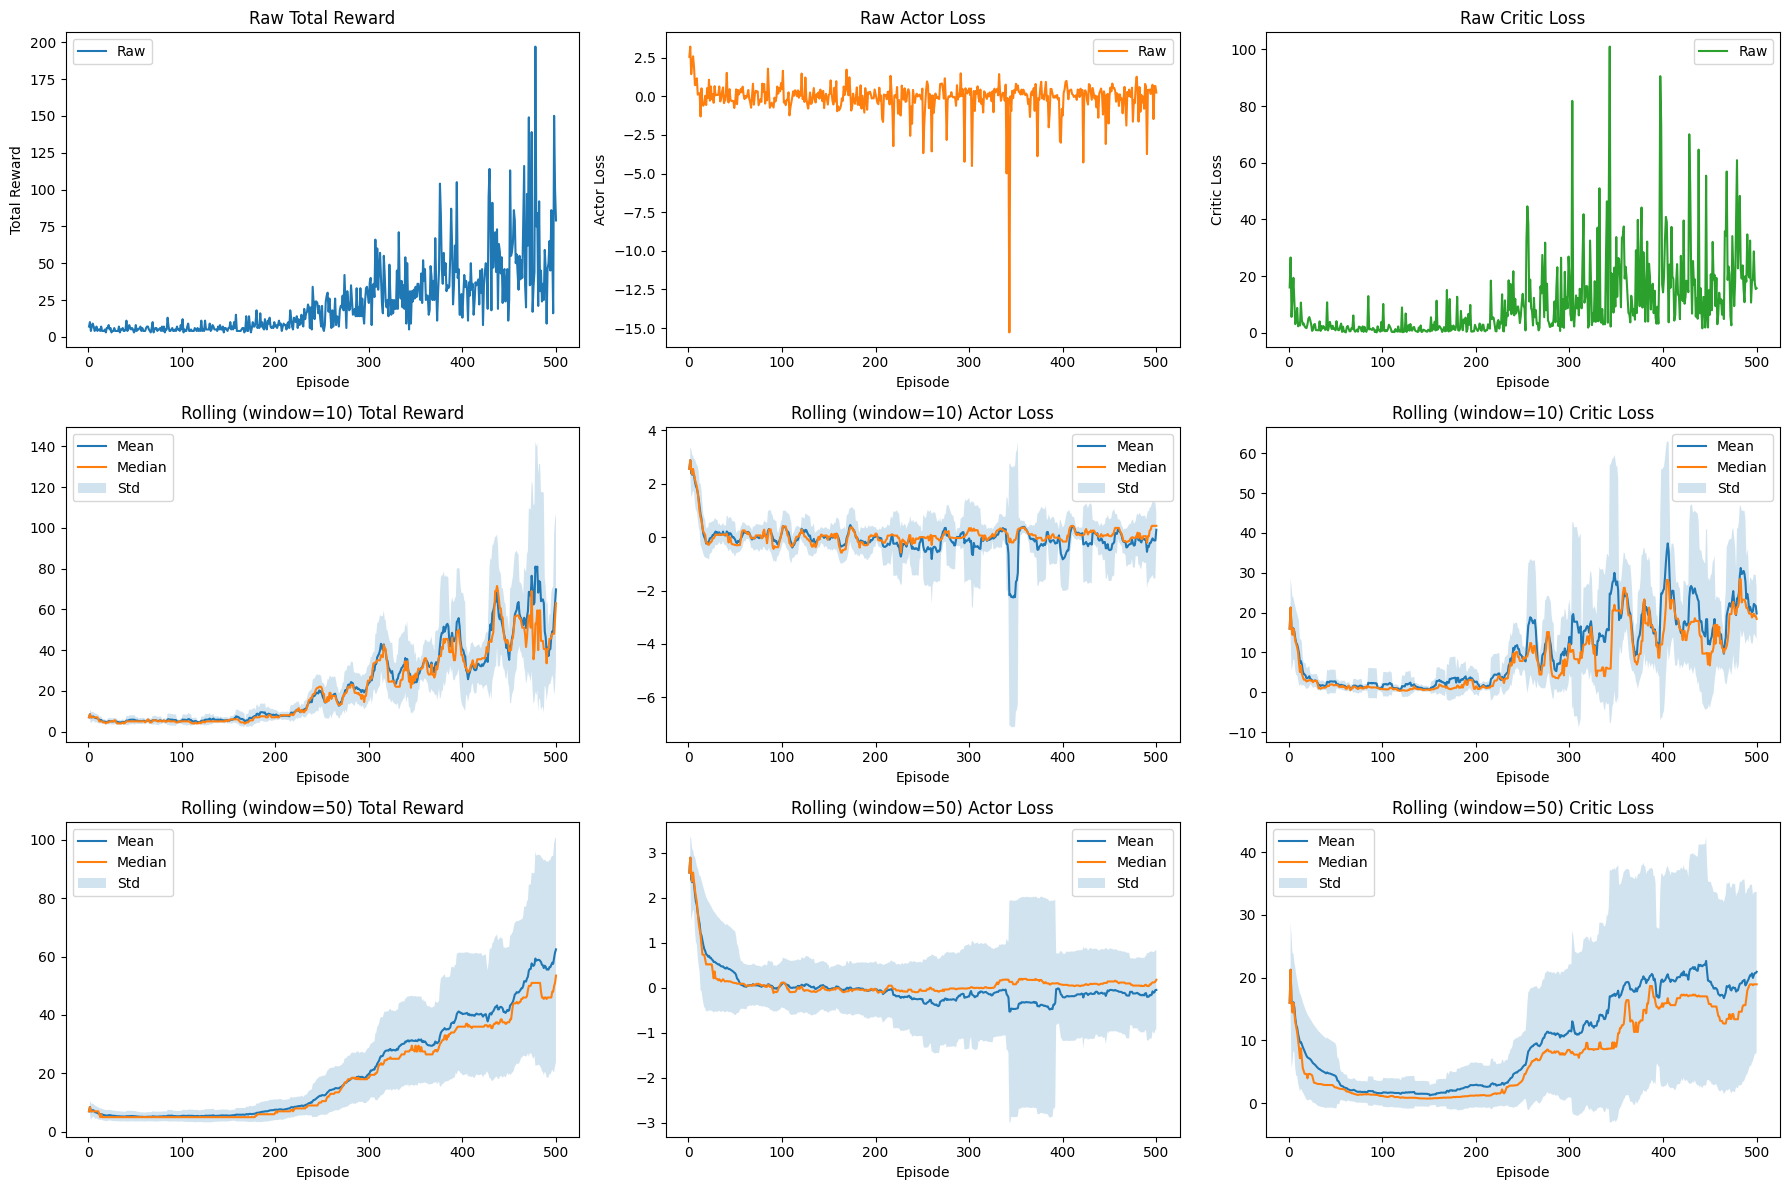

Metrics plot displayed.
Firing rate data not available (models might be Dense or logging was disabled/failed).
Closing the environment...
Environment closed.


In [3]:
# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "t_delay": 5,
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 500,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "Dense",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment with the delay mechanism
print(f"Wrapping environment with action delay t_delay={config['t_delay']}")
env = DelayedCartPoleEnv(base_env, t_delay=config["t_delay"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=10,
    window_2=50
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

Configuration loaded:
  env_name: CartPole-v1
  t_delay: 0
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 300
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: Dense
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 20
Creating base environment: CartPole-v1
Wrapping environment with action delay t_delay=0
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 300 episodes...
Episode 20	Total Reward: 35.00	Actor Loss: 2.0040	Critic Loss: 41.2218
Episode 40	Total Reward: 15.00	Actor Loss: -2.2590	Critic Loss: 28.7133
Episode 60	Total Reward: 19.00	Actor Loss: -4.4493	Critic Loss: 36.8219
Episode 80	Total Reward: 343.00	Actor Loss: 1.6206	Critic Loss: 19.1060
Episode 100	Total Reward: 104.00	Actor Loss: 3.0232	Critic Loss: 37.7969
Episode 120	Total Reward: 203.00	Actor Loss: 0.7121

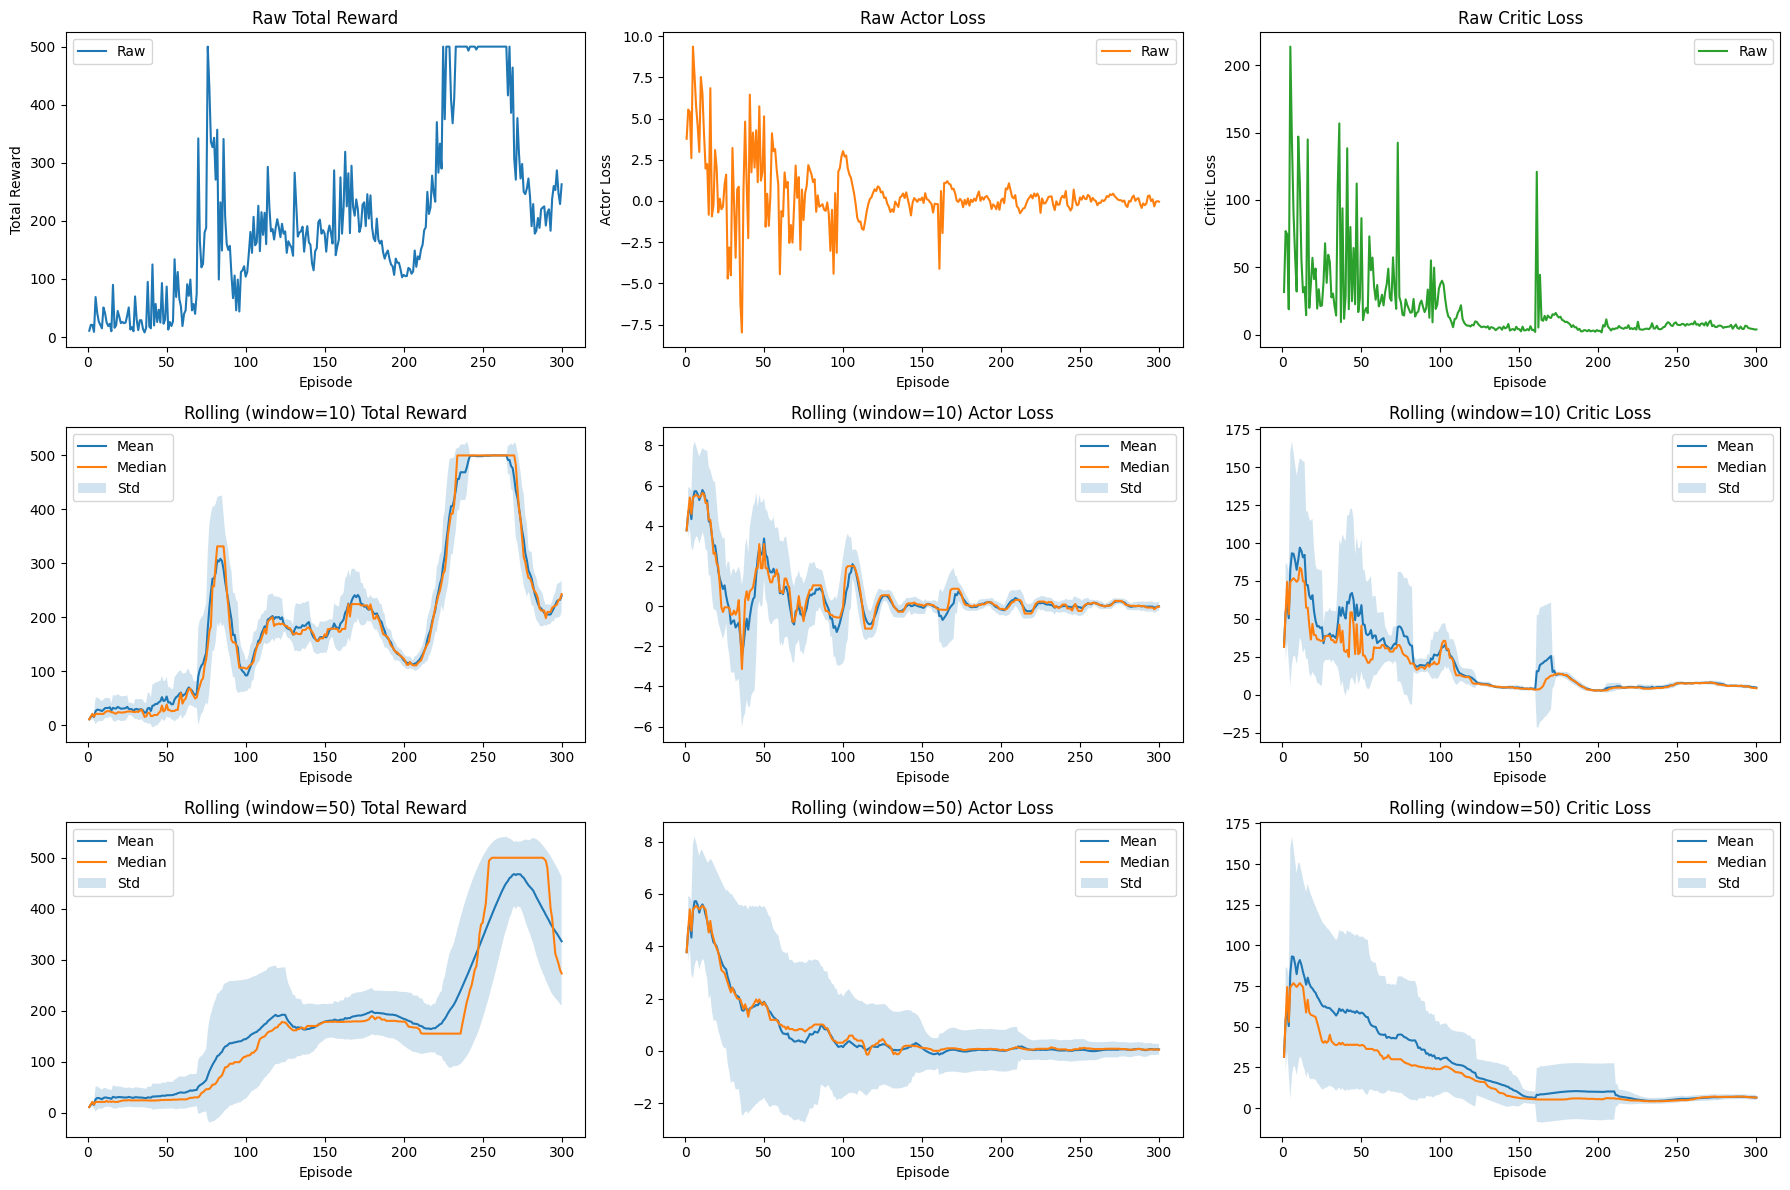

Metrics plot displayed.
Firing rate data not available (models might be Dense or logging was disabled/failed).
Closing the environment...
Environment closed.


In [4]:
# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "t_delay": 0,
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 300,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "Dense",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment with the delay mechanism
print(f"Wrapping environment with action delay t_delay={config['t_delay']}")
env = DelayedCartPoleEnv(base_env, t_delay=config["t_delay"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=10,
    window_2=50
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")